In [88]:
import pandas as pd
import numpy as np
import os
import vitaldb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
tid="https://api.vitaldb.net/trks" # Vital DB Web API
data = pd.read_csv(tid) ##
Allheart = data[data["tname"] == "Solar8000/HR"].reset_index(drop=True)["tid"] ## dataframe of all cases of HR data

In [2]:
HRDATA = [] # Iterates through each case and creates a sperate dataframe for each patient
for i,tid in enumerate(Allheart[0:100]):
    dfi = pd.read_csv(f"https://api.vitaldb.net/{tid}").dropna()
    dfi['id'] = i+1 
    HRDATA.append(dfi)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
rmse_list = []
def train_and_predict_multiple(dataframes, num_lags):
    global rmse_list  # List to store RMSE values
    for idx, df in enumerate(dataframes, 1):
        for i in range(1, num_lags + 1):
            df[f'Lag_{i}'] = df['Solar8000/HR'].shift(i)
        df.dropna(inplace=True)
        
        # Define features (lagged values) and target
        X = df[[f"Lag_{num_lags}"]]  # Include lagged features
        y = df[['Solar8000/HR']]  # Target variable

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict Solar8000/HR using lagged features
        predictions = model.predict(X_test)

        # Plot actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test.index, y_test, label='Actual', color='blue')
        plt.scatter(X_test.index, predictions, label='Predicted', color='red')
        plt.xlabel('Time')
        plt.ylabel('Solar8000/HR')
        plt.title('Actual vs Predicted Solar8000/HR')
        plt.legend()
        plt.savefig(f"C:\\Users\\colek\\Downloads\\AR Predictions\\AR_Prediction_{idx}.png")
        plt.show()
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        print("Root Mean Squared Error:", rmse)
        rmse_list.append(rmse)

# Example usage:
# rmses = train_and_predict_multiple([HR1, HR2, HR3], num_lags=10)


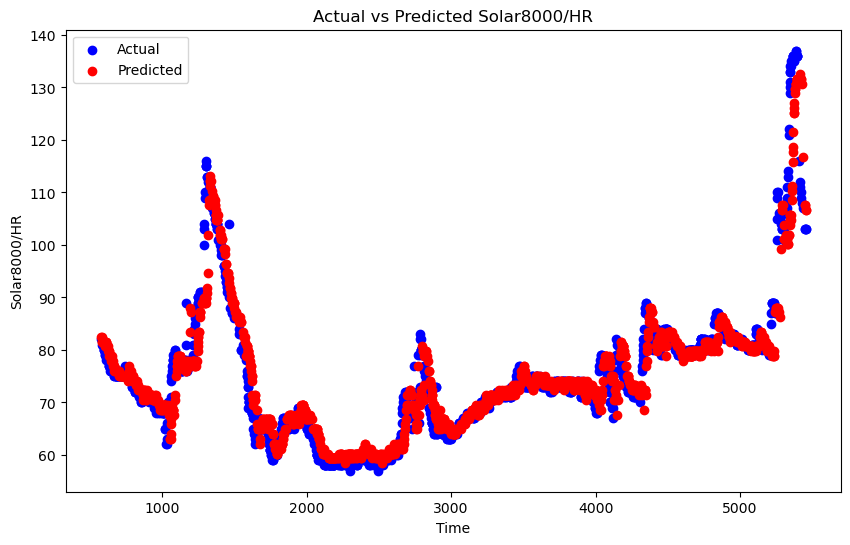

Root Mean Squared Error: 4.903666071145836


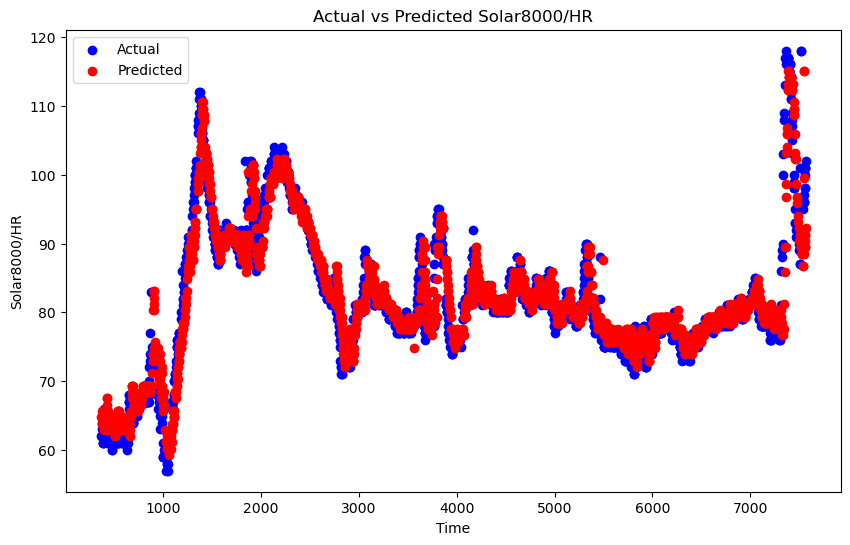

Root Mean Squared Error: 3.7033310007102926


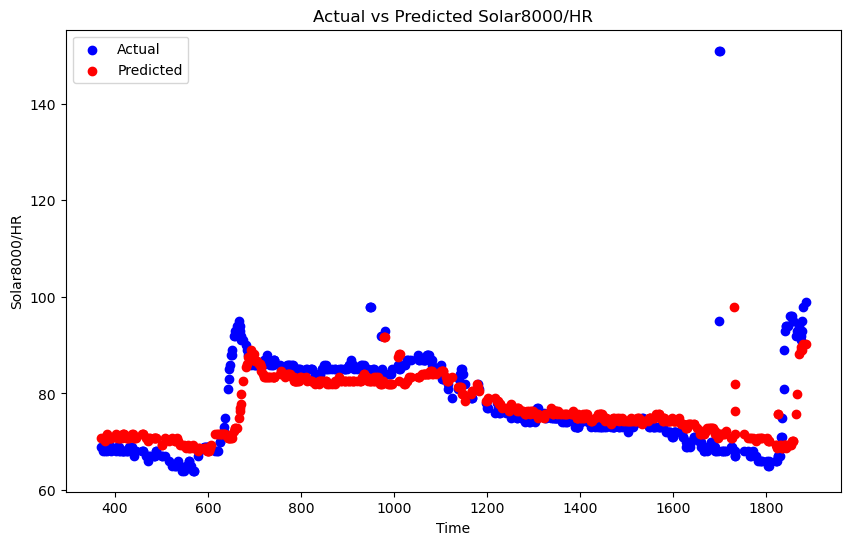

Root Mean Squared Error: 7.705027934688284


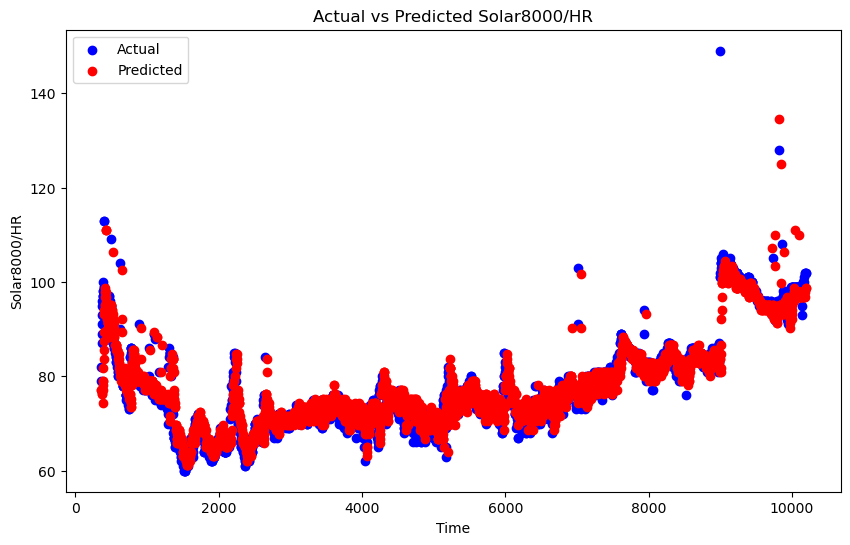

Root Mean Squared Error: 3.842395219345501


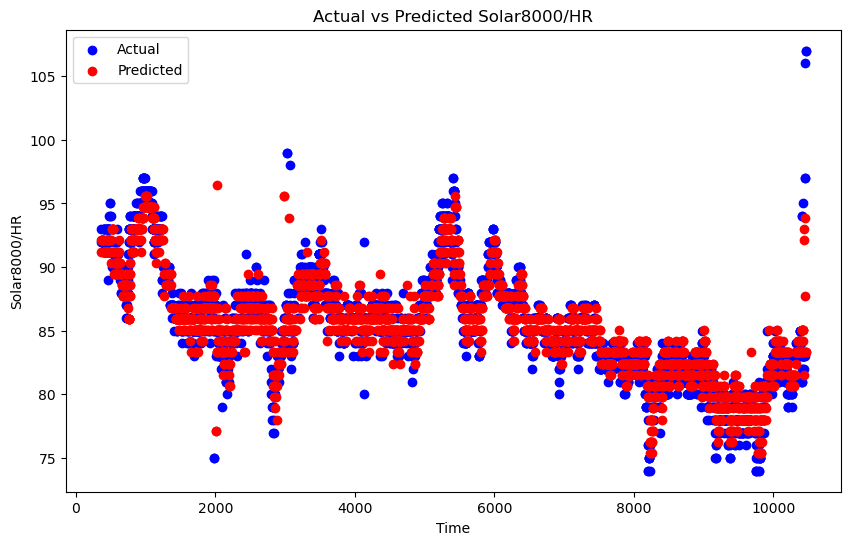

Root Mean Squared Error: 2.0048363878643753


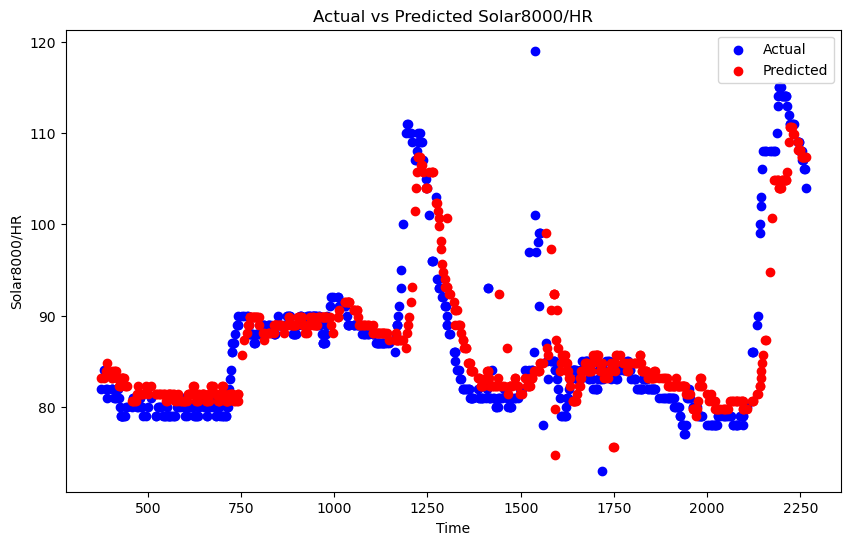

Root Mean Squared Error: 4.99305275709079


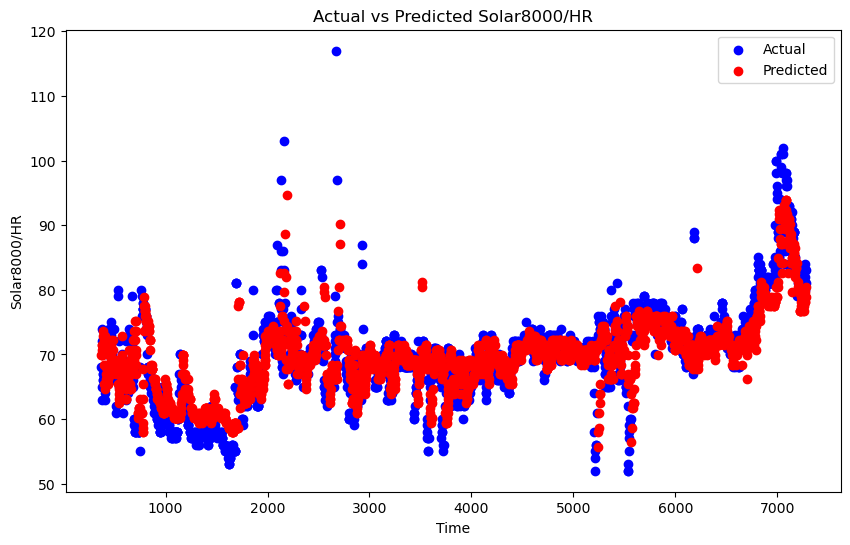

Root Mean Squared Error: 4.908088303319431


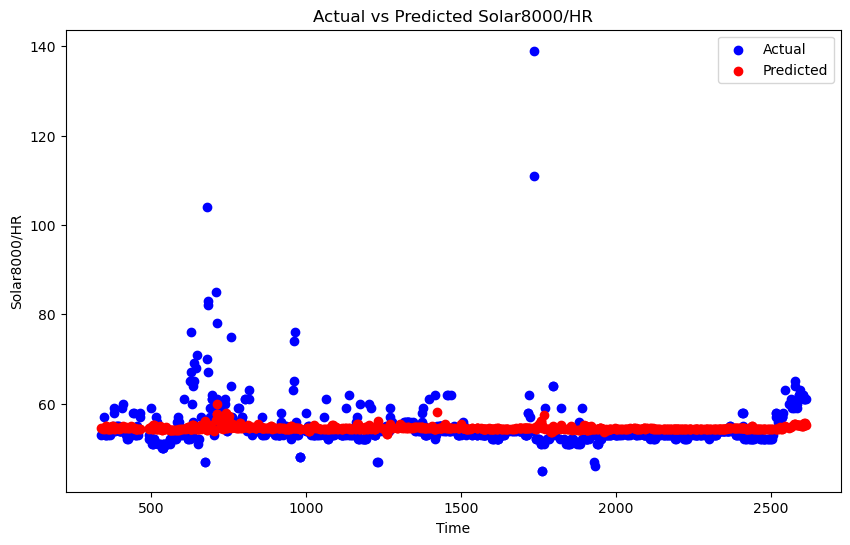

Root Mean Squared Error: 5.669688460470842


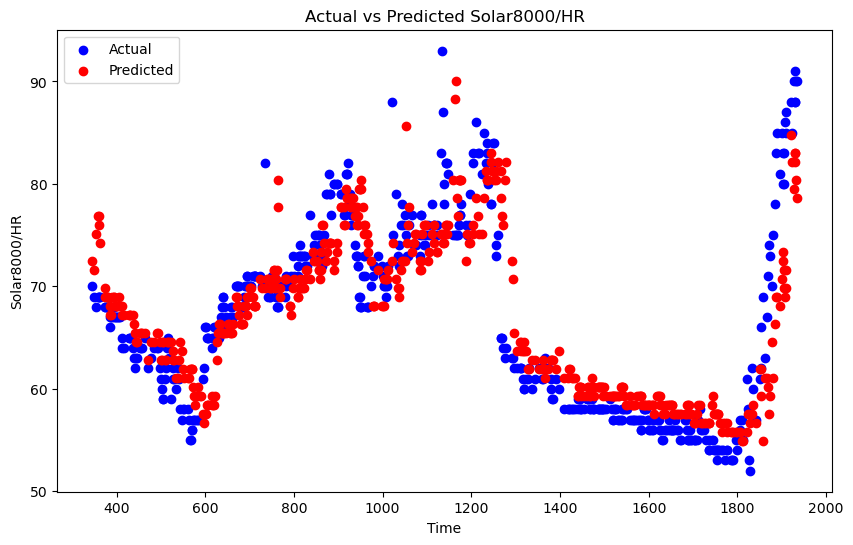

Root Mean Squared Error: 4.818809688353182


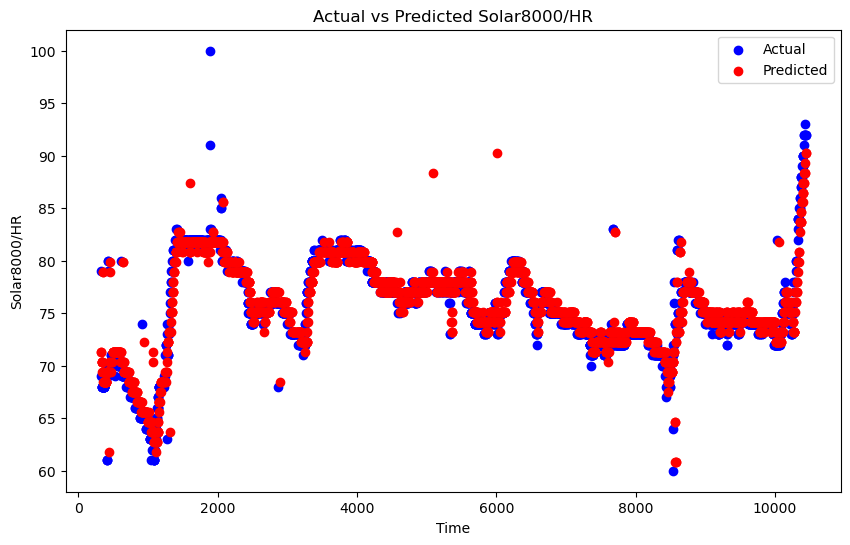

Root Mean Squared Error: 1.5848019992999267


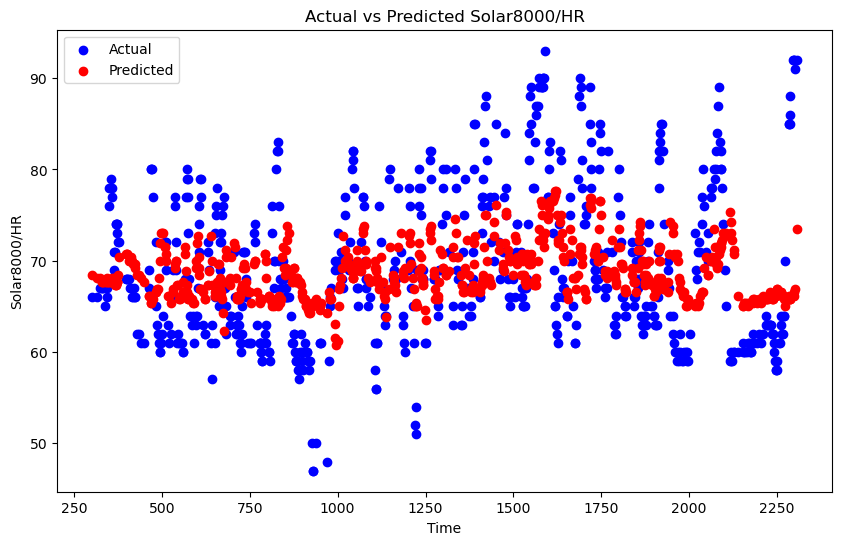

Root Mean Squared Error: 7.83086231416696


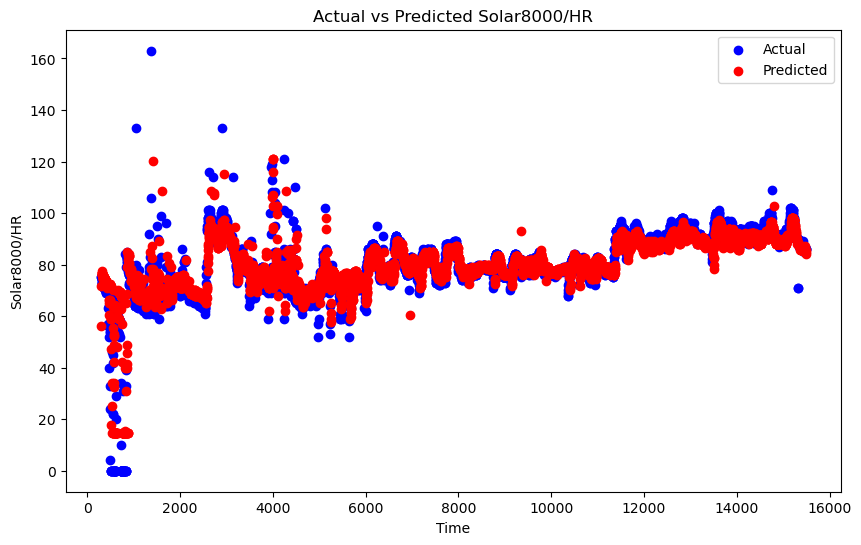

Root Mean Squared Error: 7.743039376078618


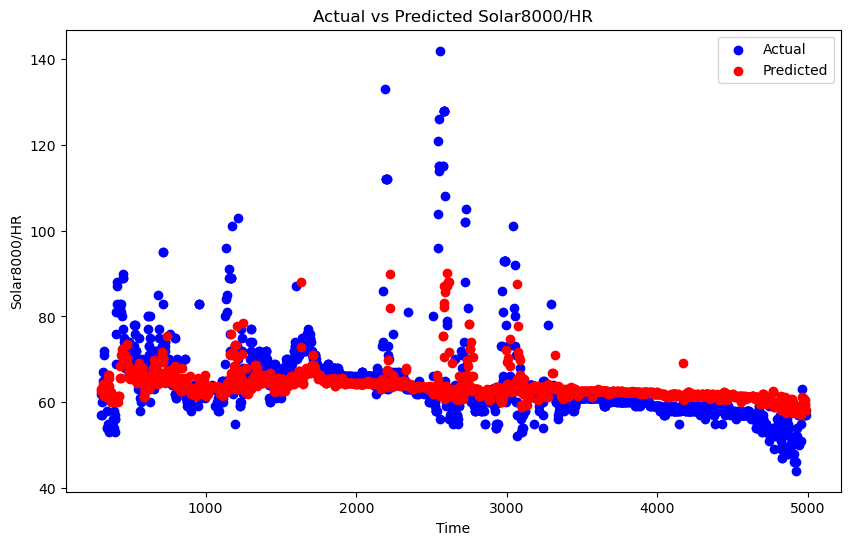

Root Mean Squared Error: 9.077324822065732


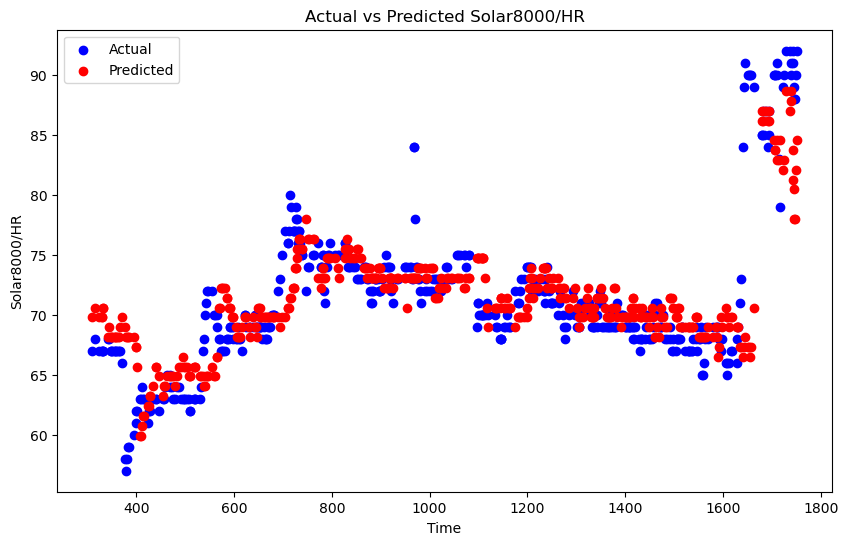

Root Mean Squared Error: 4.073748532442907


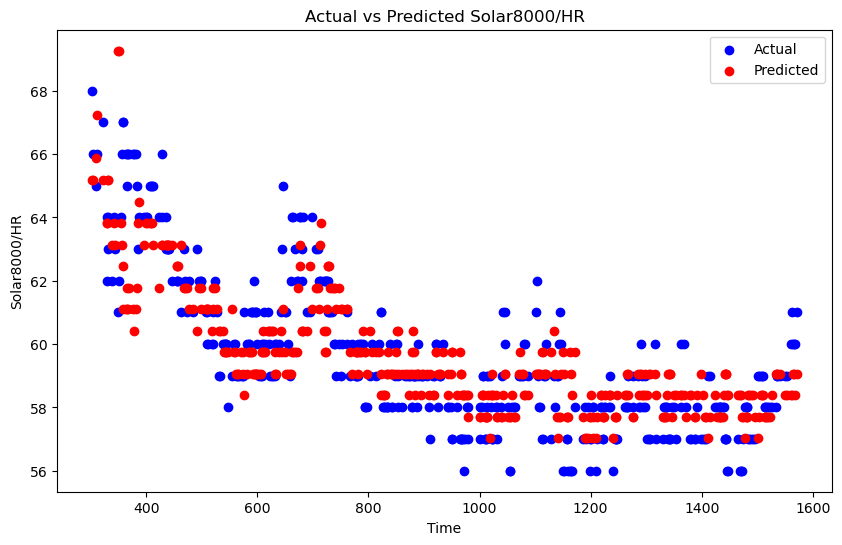

Root Mean Squared Error: 1.6257419760409846


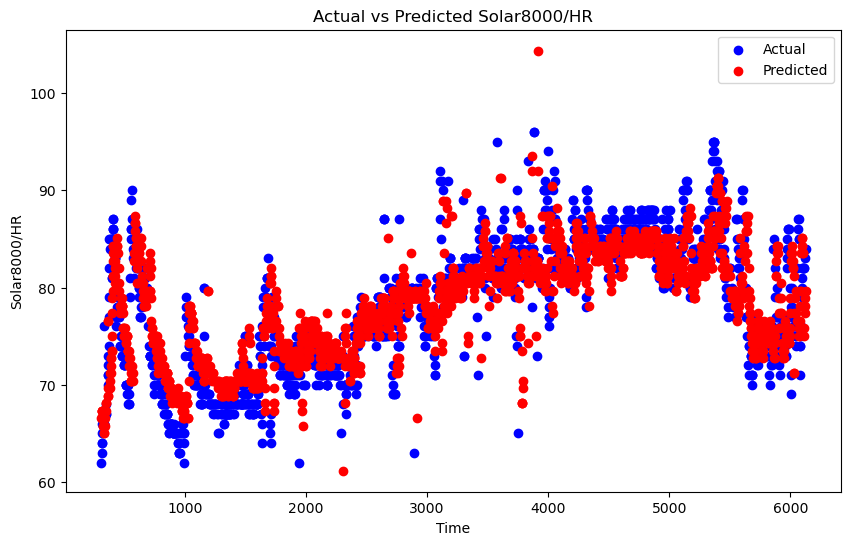

Root Mean Squared Error: 4.385382207497422


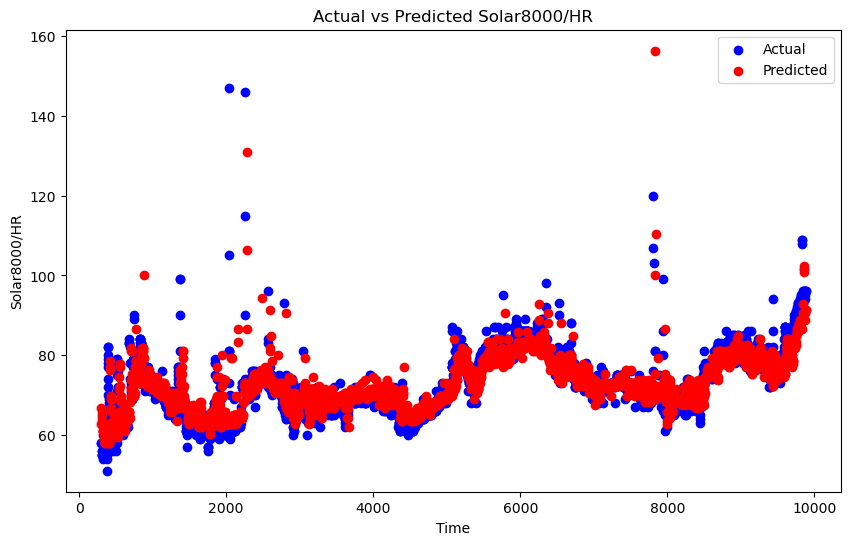

Root Mean Squared Error: 5.391596782346681


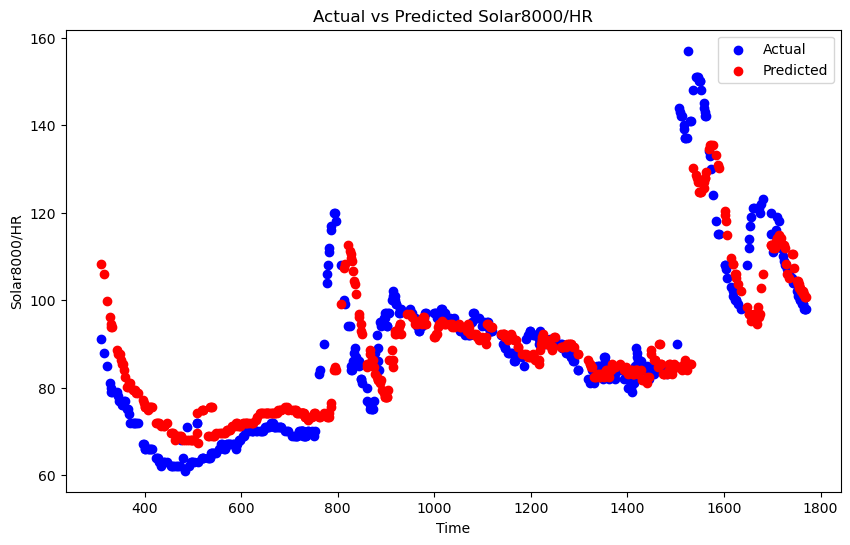

Root Mean Squared Error: 13.075325480313591


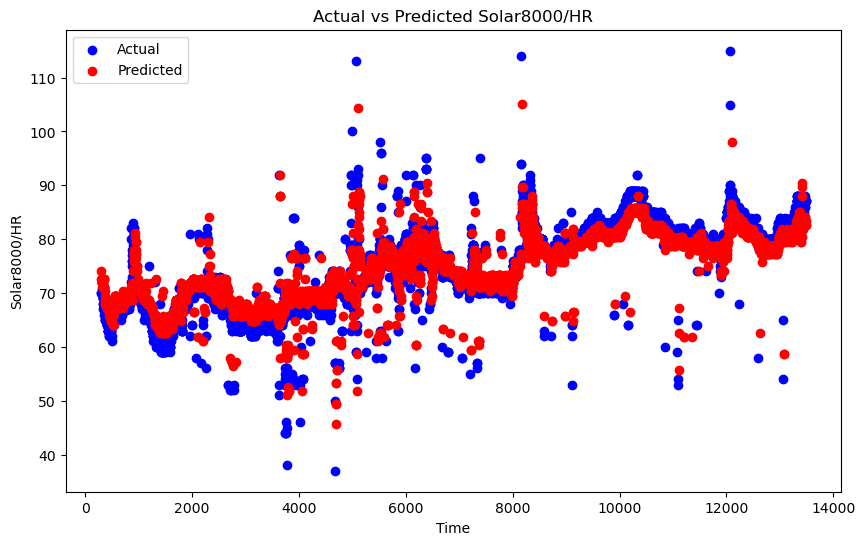

Root Mean Squared Error: 4.822137798553789


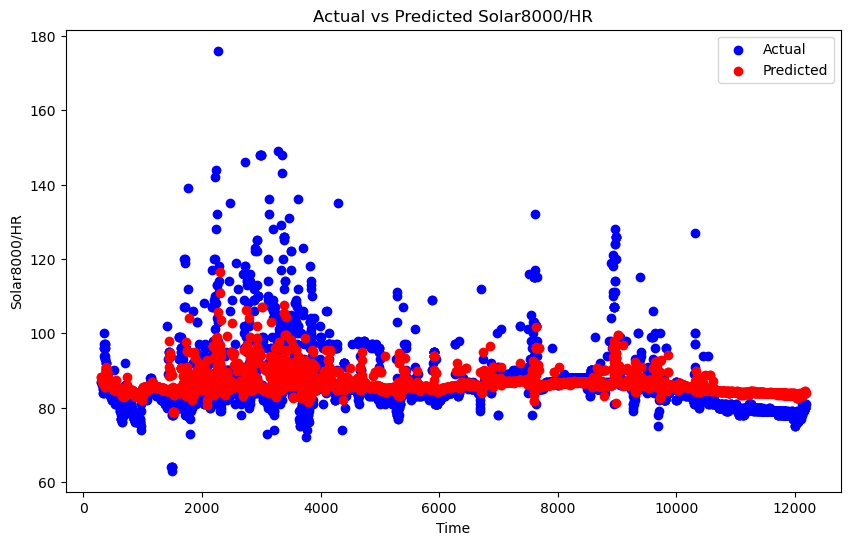

Root Mean Squared Error: 7.856270645353083


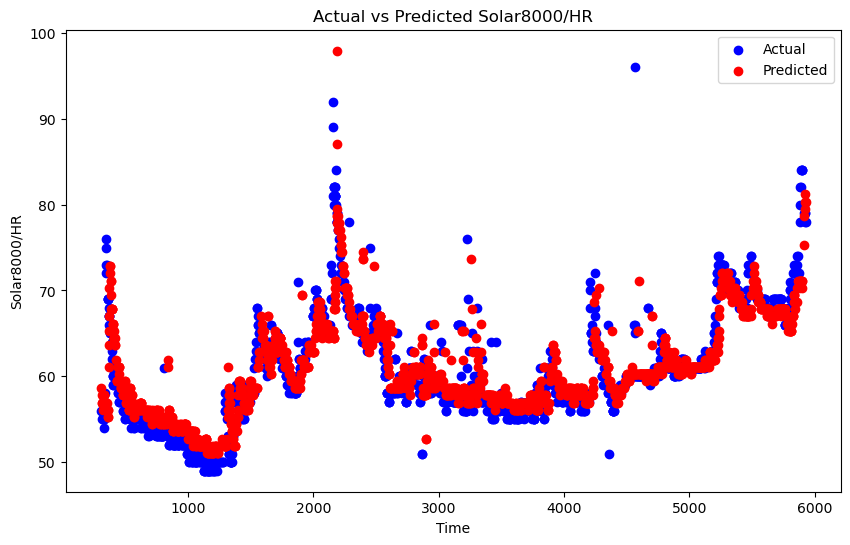

Root Mean Squared Error: 3.526758424077996


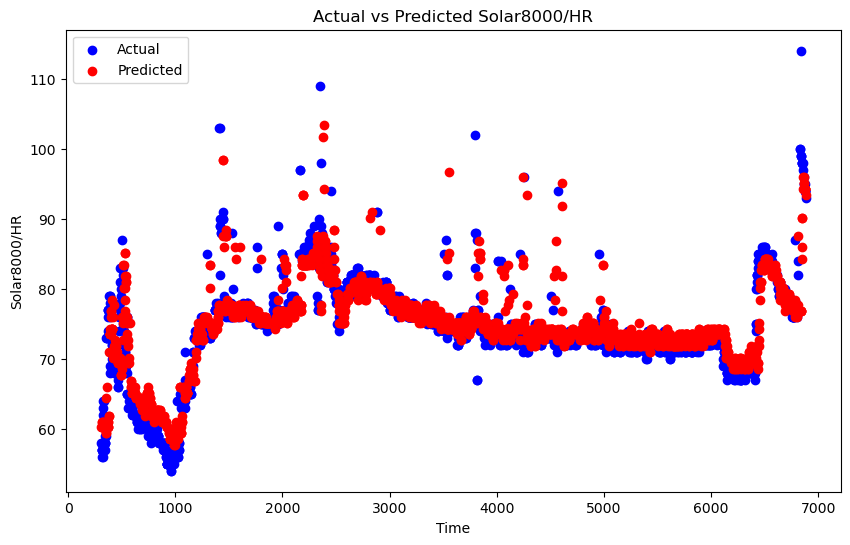

Root Mean Squared Error: 4.038965578182589


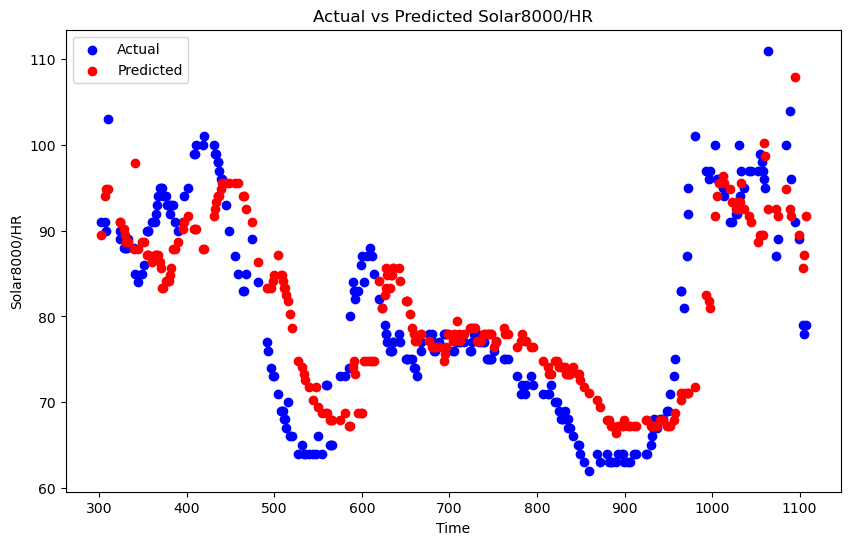

Root Mean Squared Error: 7.549437786213809


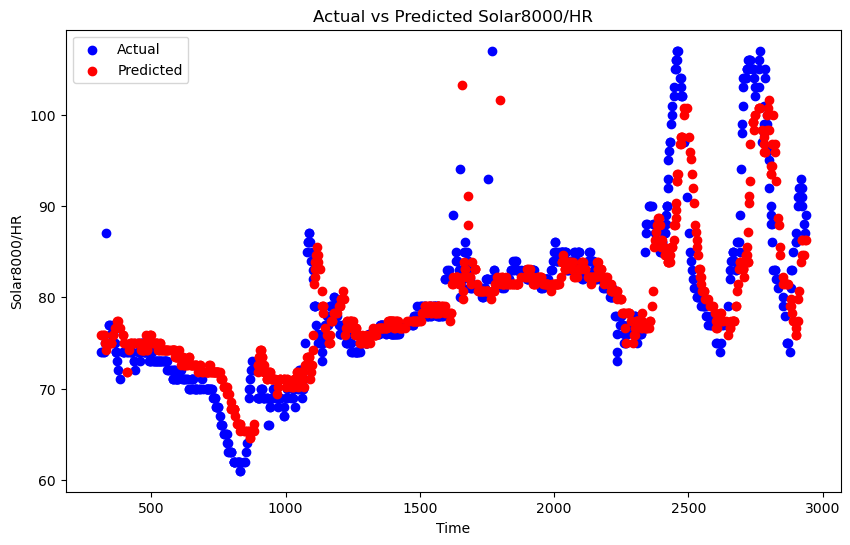

Root Mean Squared Error: 5.169030651029872


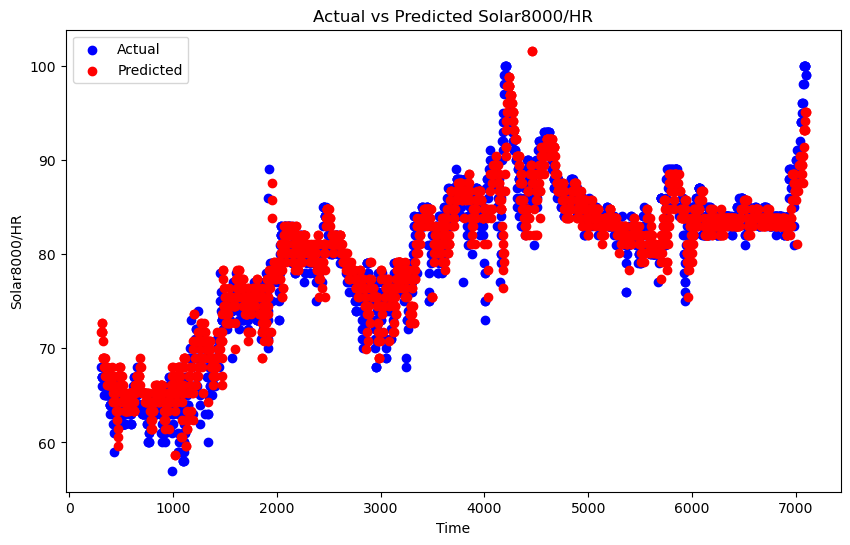

Root Mean Squared Error: 3.083043749231712


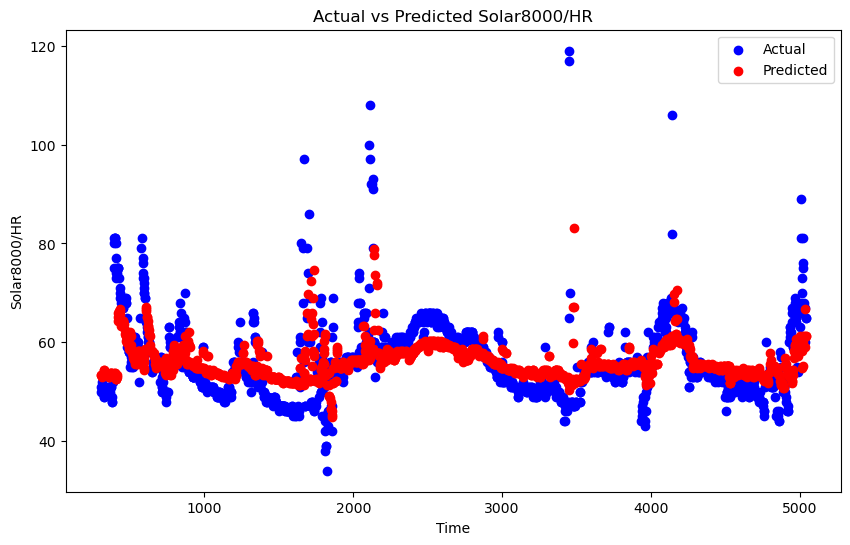

Root Mean Squared Error: 7.134010674397554


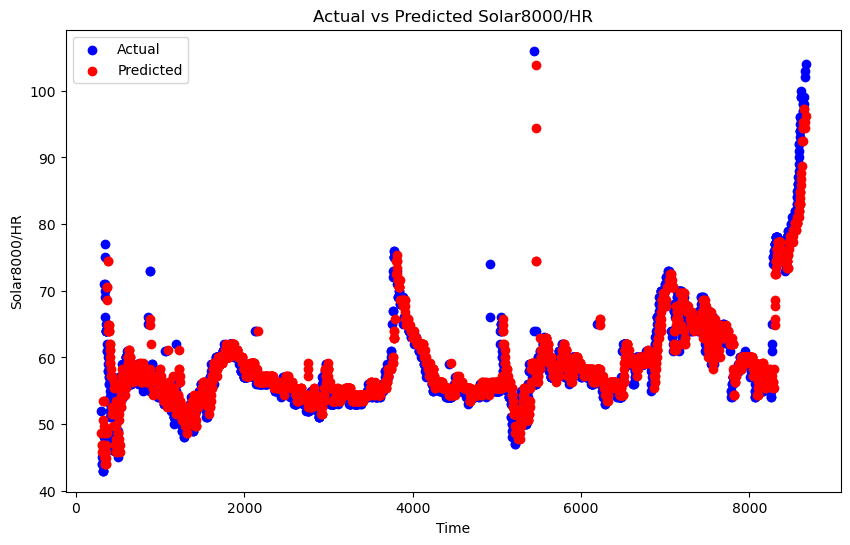

Root Mean Squared Error: 3.54216857632363


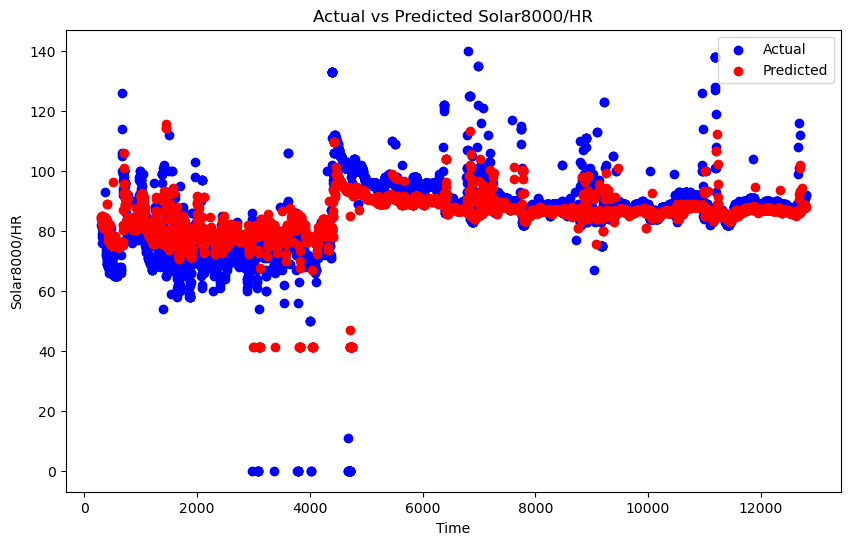

Root Mean Squared Error: 11.723301248397036


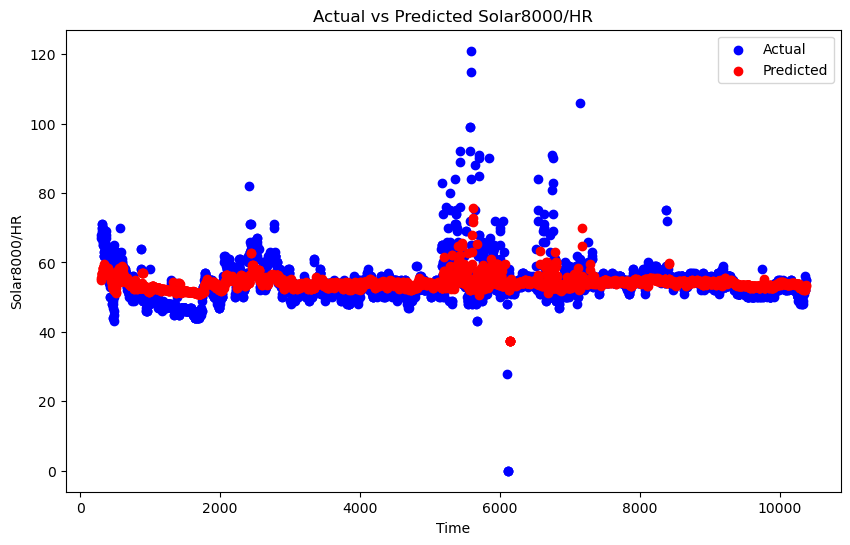

Root Mean Squared Error: 5.479197404872624


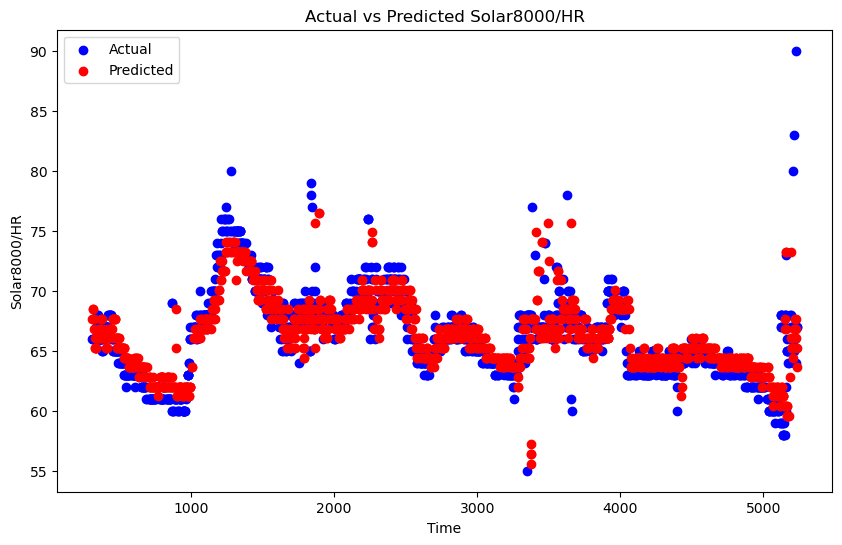

Root Mean Squared Error: 2.23969705229777


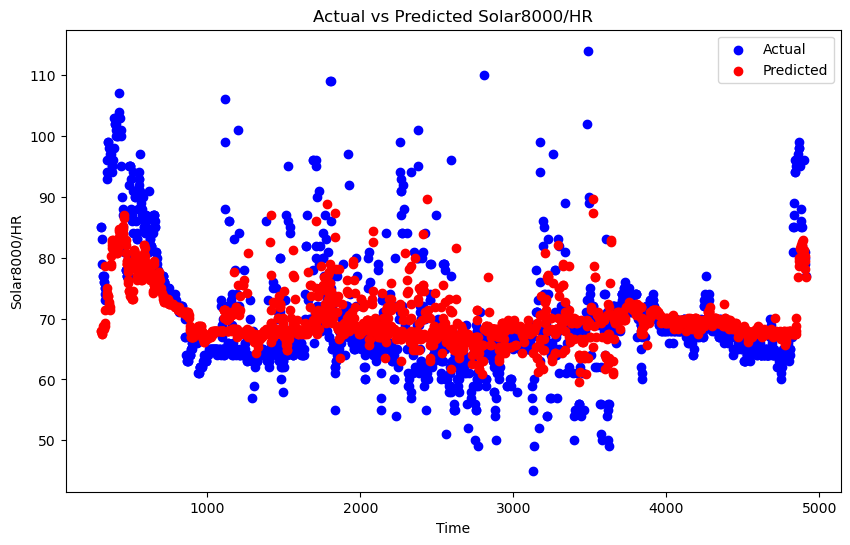

Root Mean Squared Error: 8.451878133616335


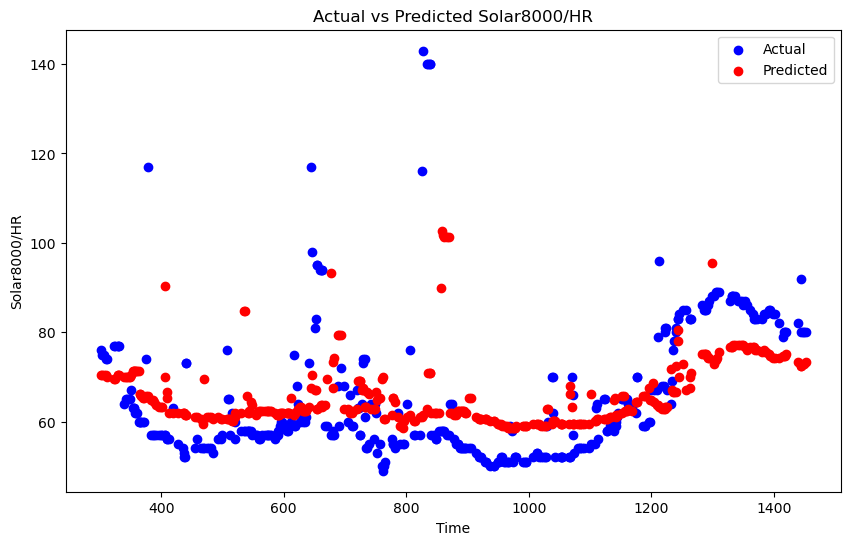

Root Mean Squared Error: 14.495147099872938


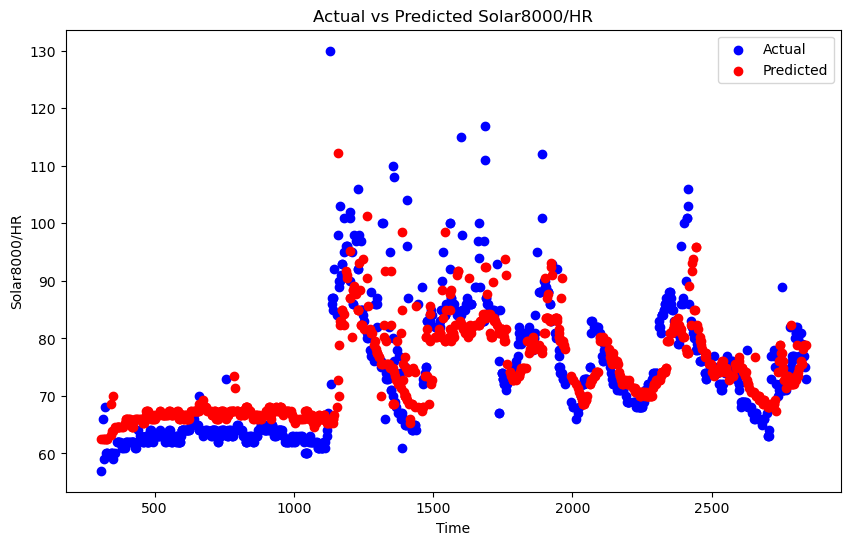

Root Mean Squared Error: 7.855250620302004


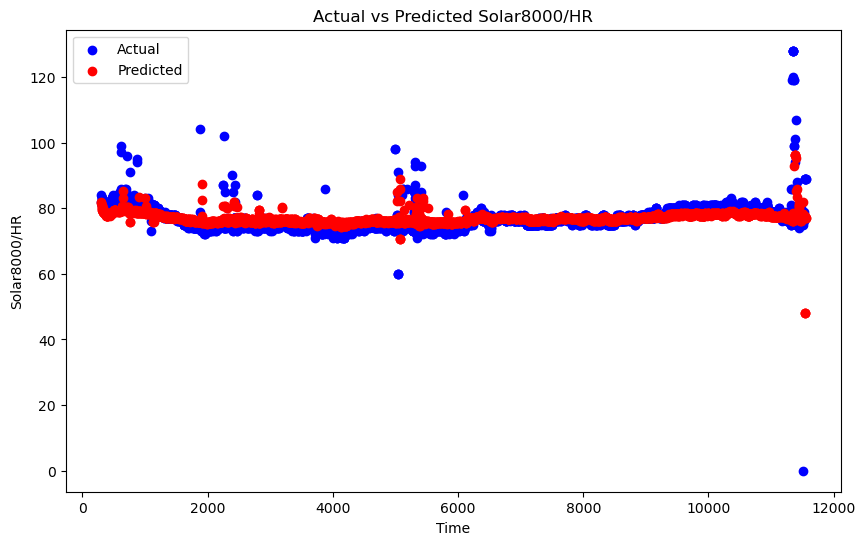

Root Mean Squared Error: 3.893040385183147


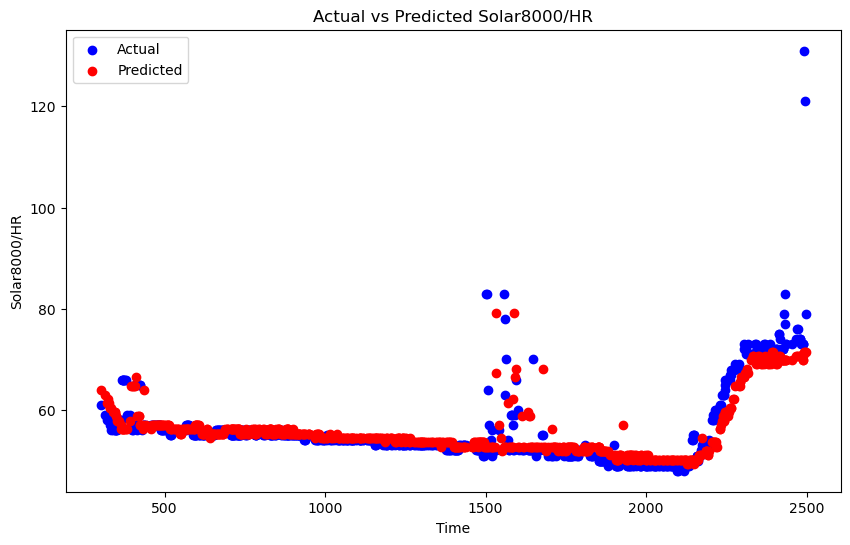

Root Mean Squared Error: 4.818627580290155


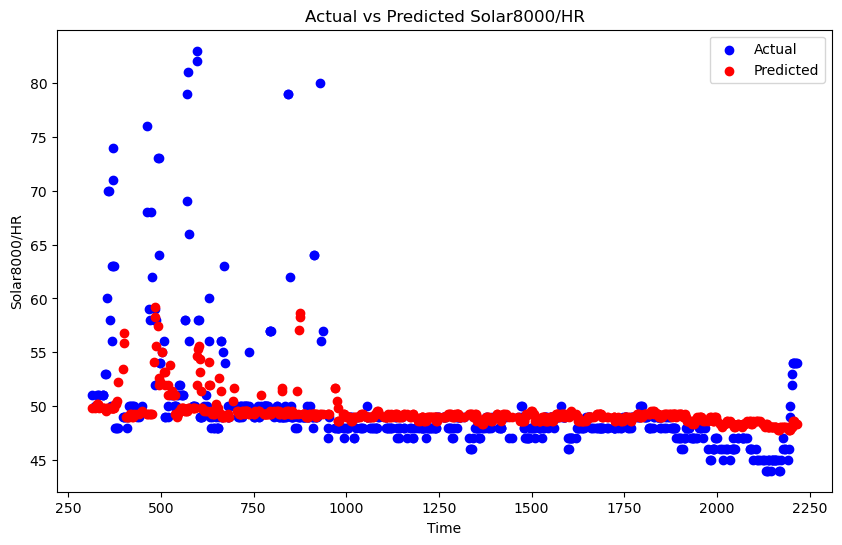

Root Mean Squared Error: 4.954472093637379


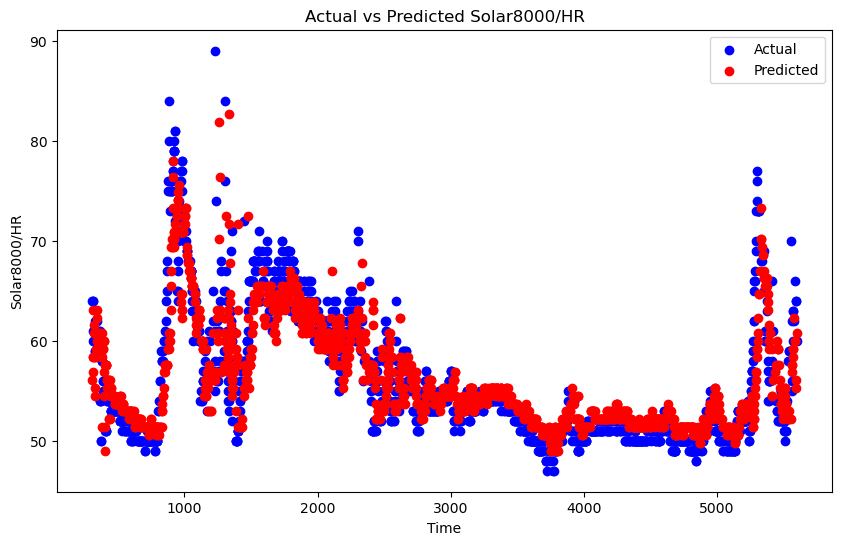

Root Mean Squared Error: 3.8937177692654386


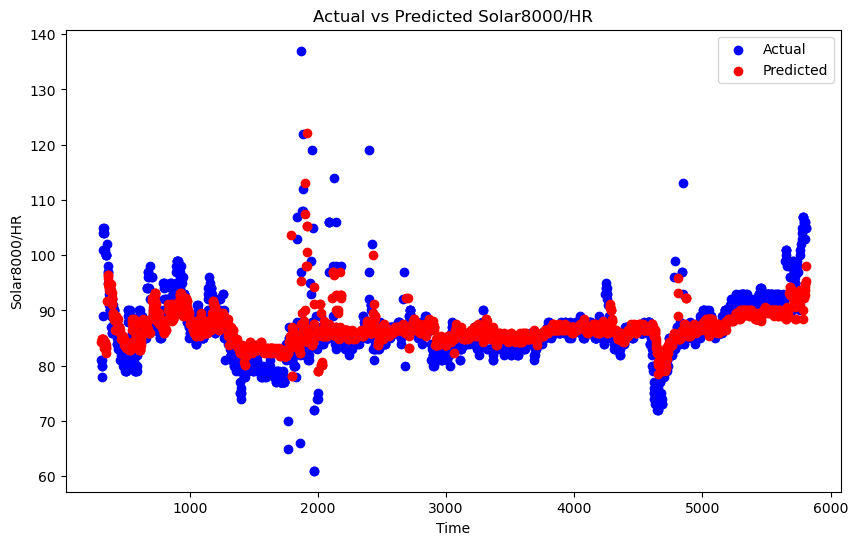

Root Mean Squared Error: 5.047432703225063


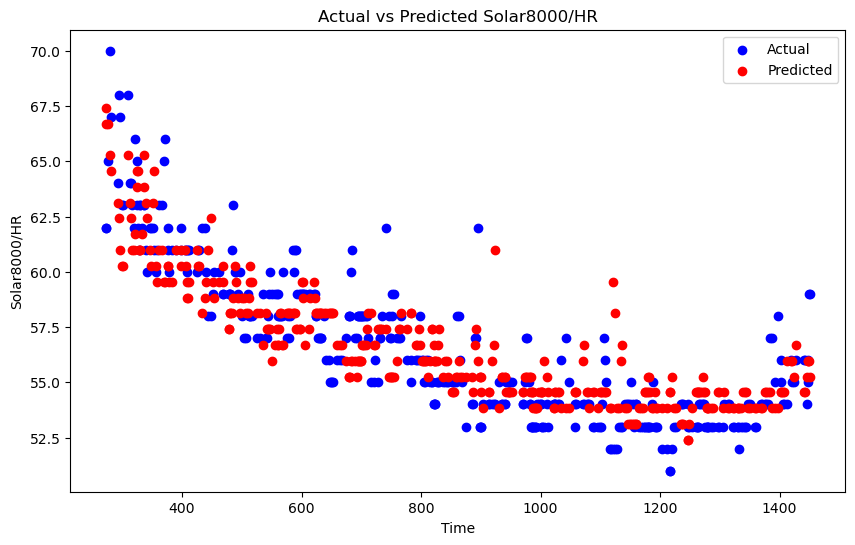

Root Mean Squared Error: 1.9276676739085767


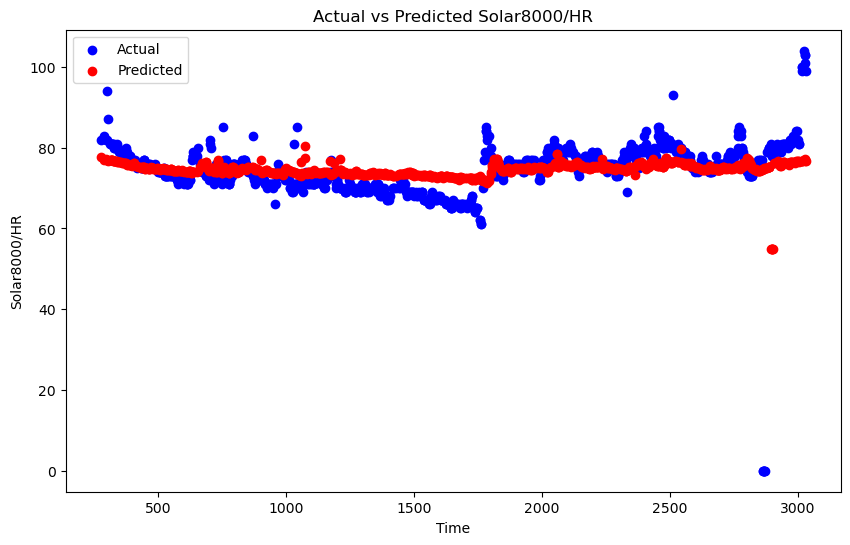

Root Mean Squared Error: 7.761650749869891


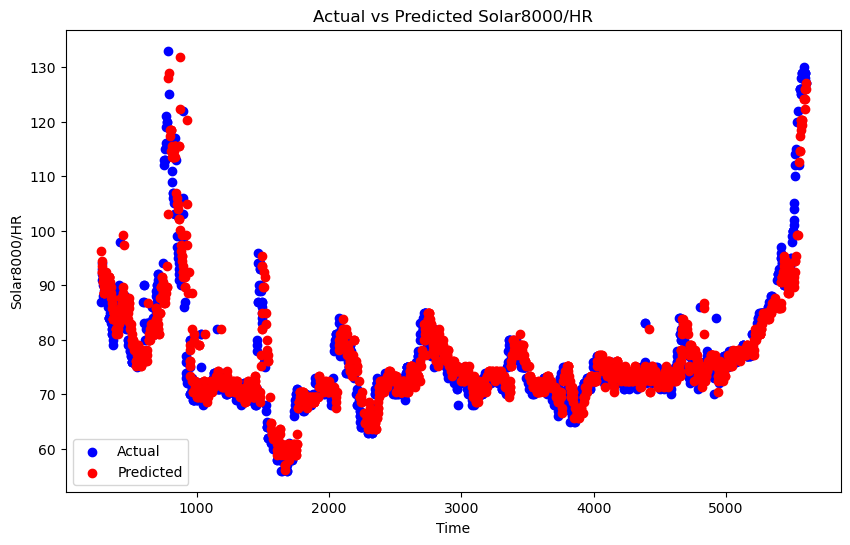

Root Mean Squared Error: 5.339791785562685


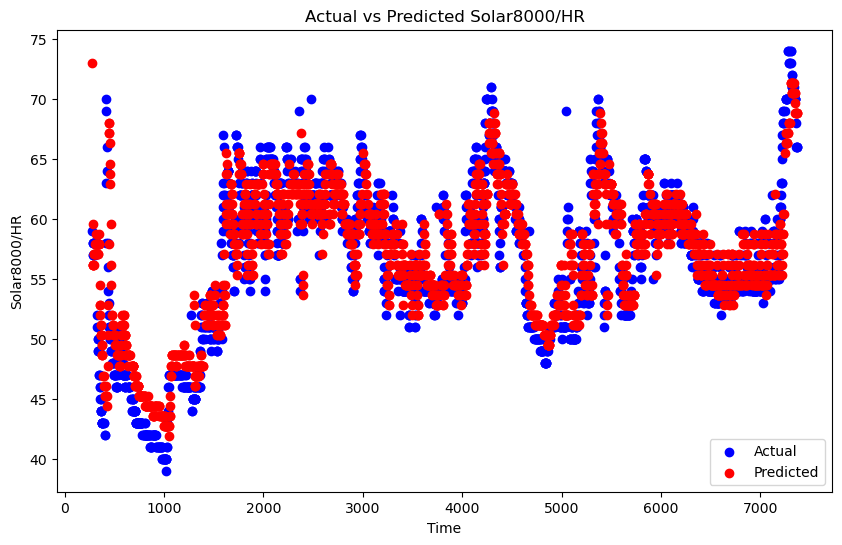

Root Mean Squared Error: 3.6325206717547878


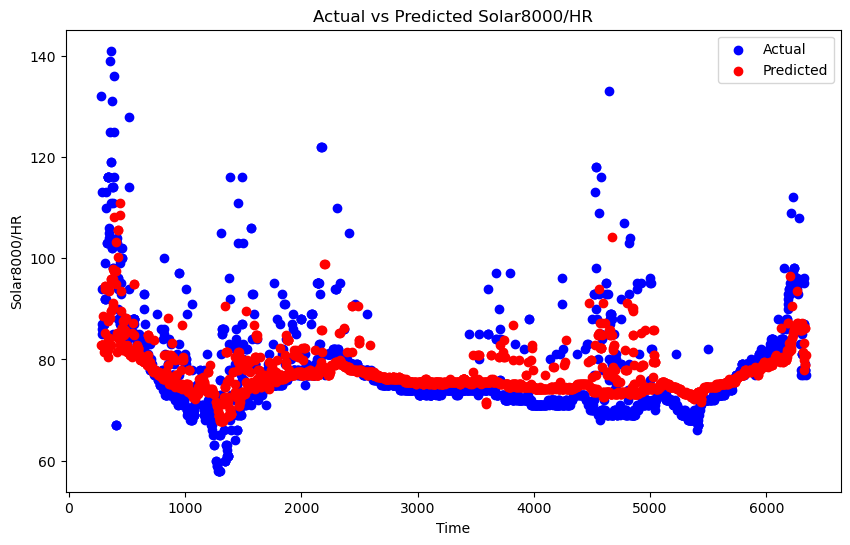

Root Mean Squared Error: 8.178933115569215


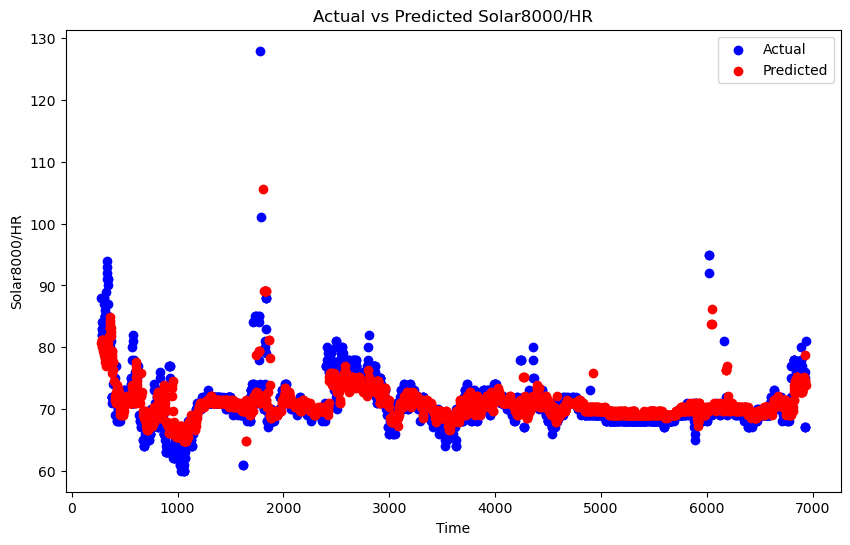

Root Mean Squared Error: 3.2798089001392667


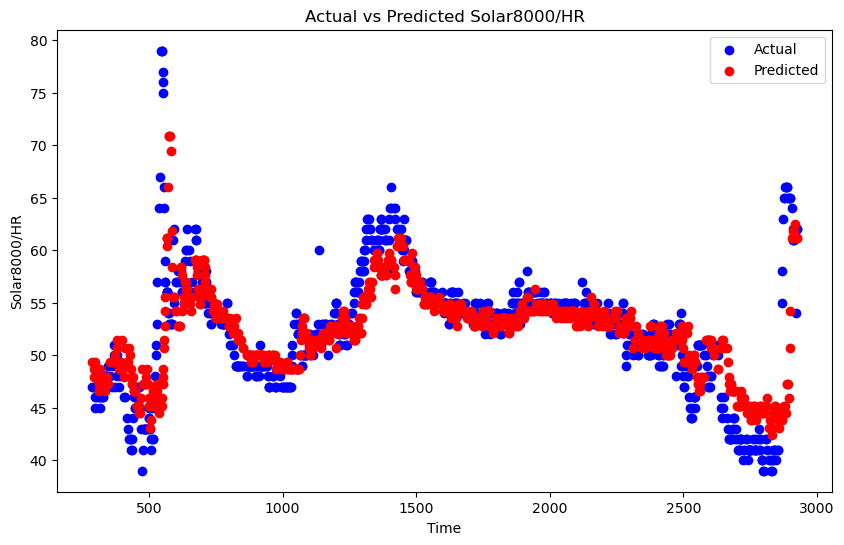

Root Mean Squared Error: 4.606693022101397


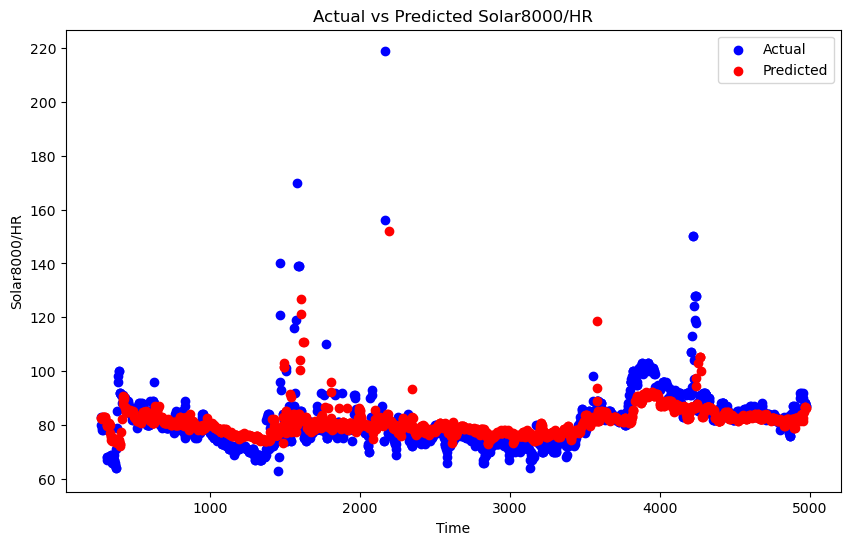

Root Mean Squared Error: 9.06062994337896


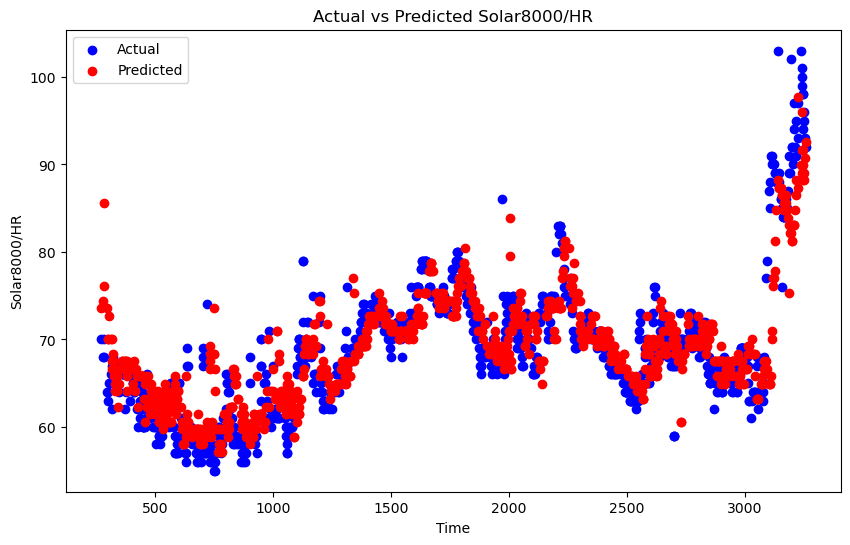

Root Mean Squared Error: 4.543440312724421


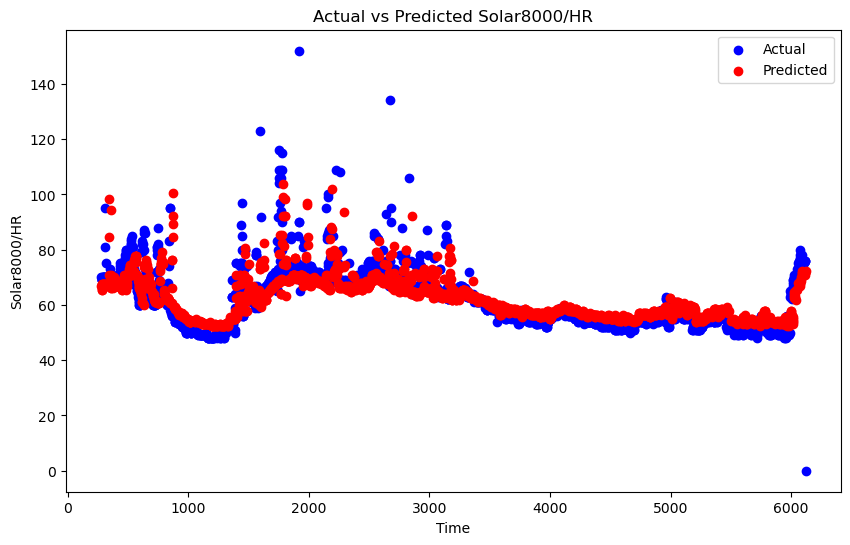

Root Mean Squared Error: 7.641973182755039


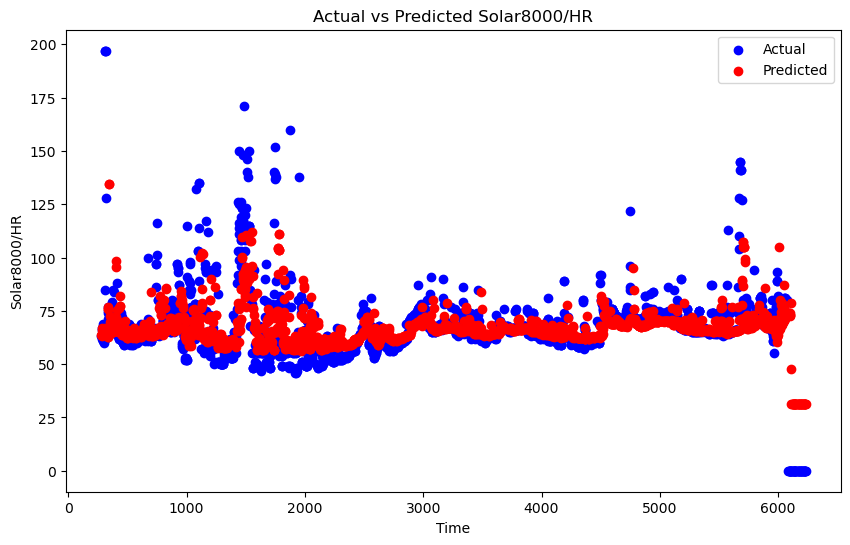

Root Mean Squared Error: 15.992557925324055


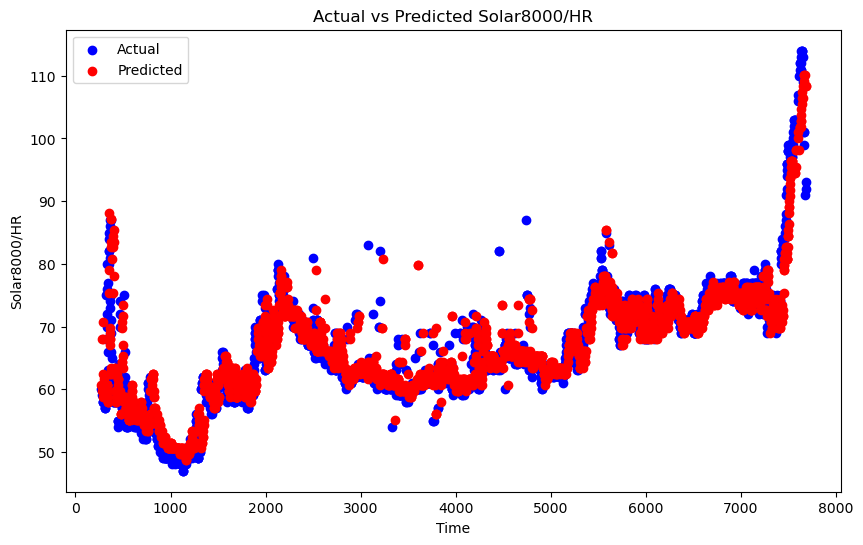

Root Mean Squared Error: 4.194921249032538


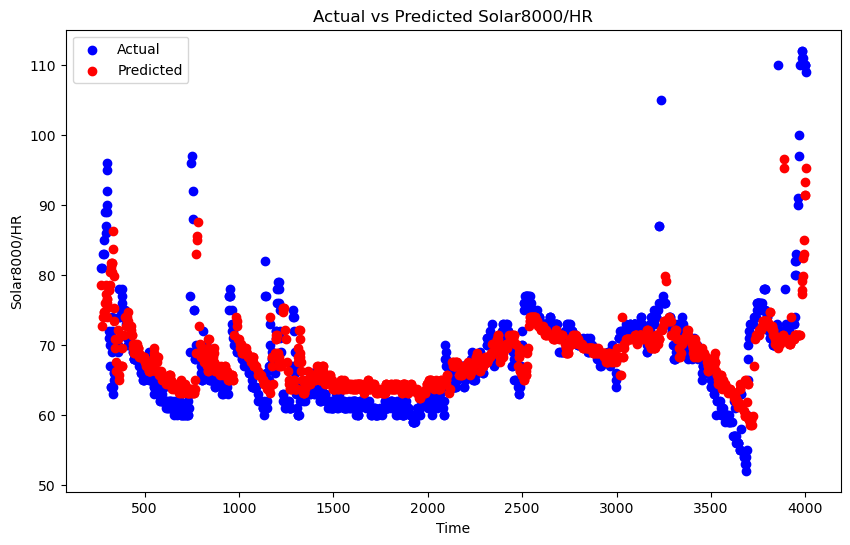

Root Mean Squared Error: 5.8335282586512305


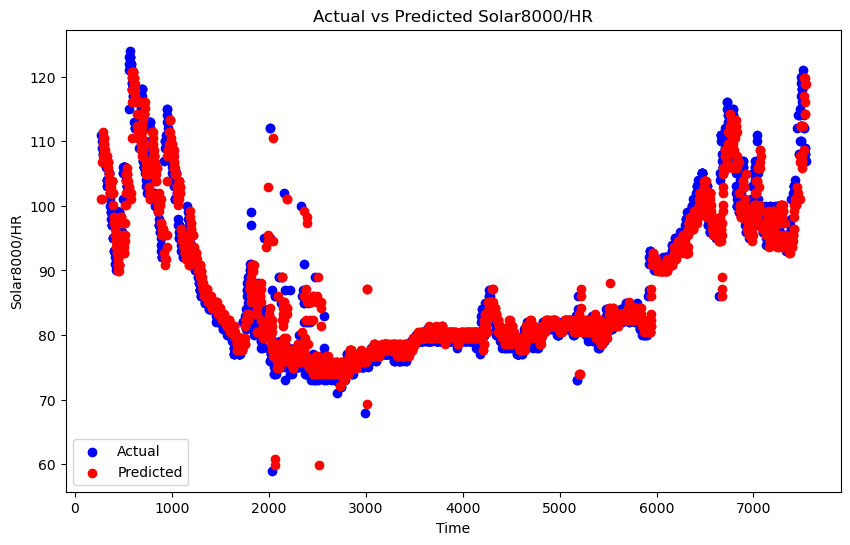

Root Mean Squared Error: 4.3464585390290935


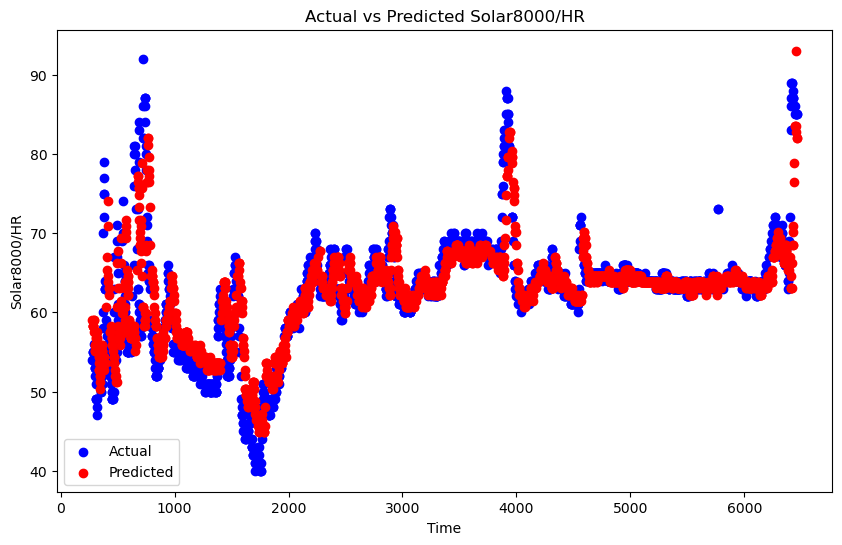

Root Mean Squared Error: 4.773190915996651


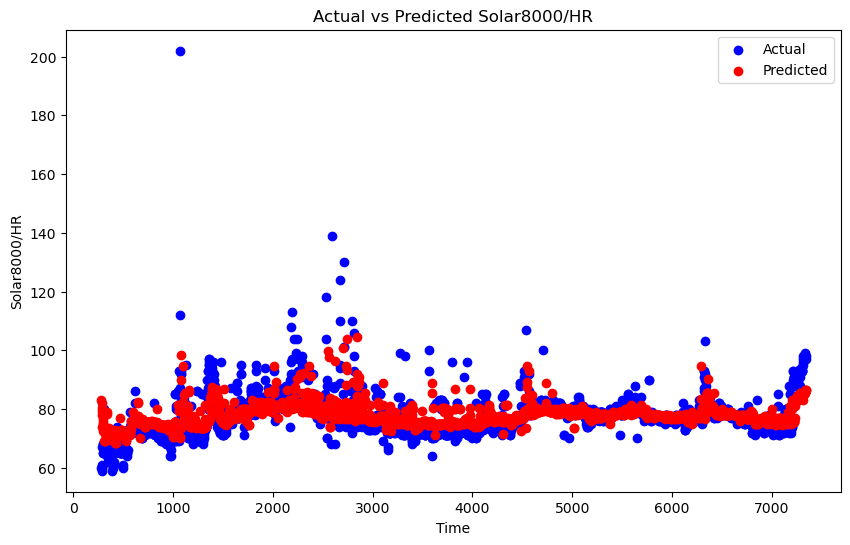

Root Mean Squared Error: 6.551020370167327


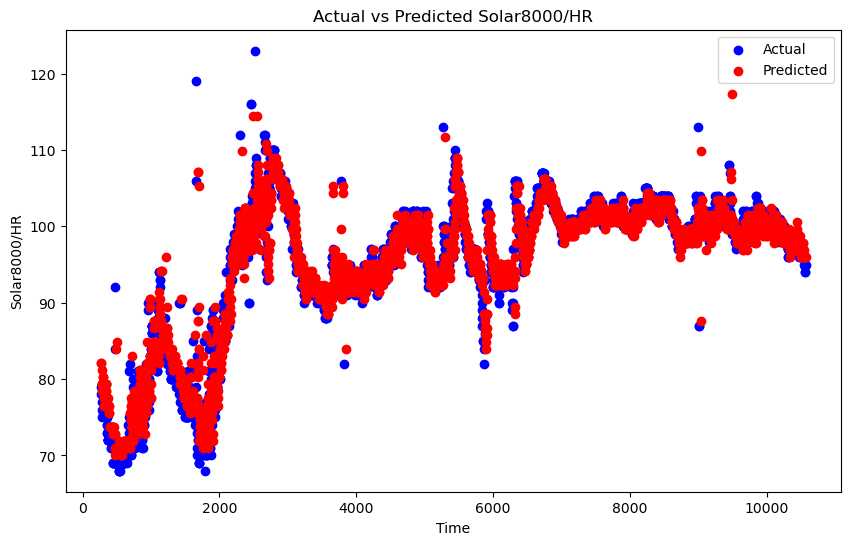

Root Mean Squared Error: 3.3161486369133004


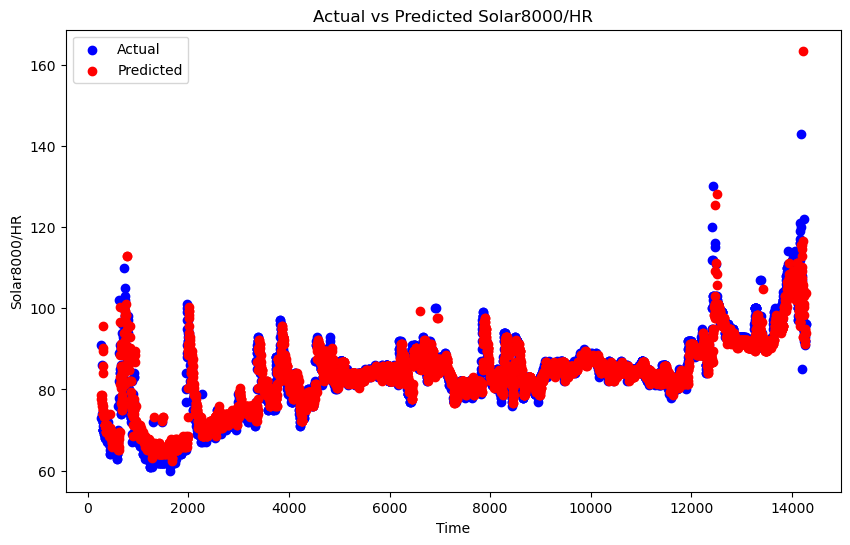

Root Mean Squared Error: 4.045791246105774


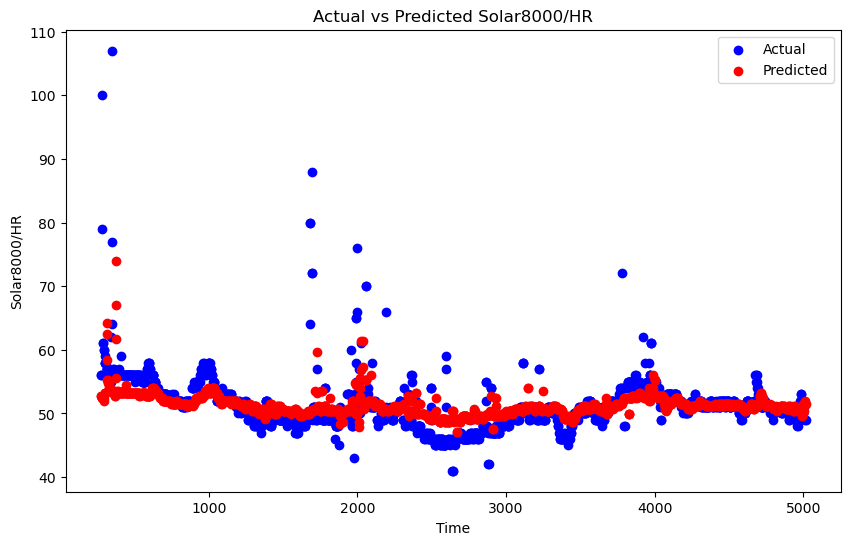

Root Mean Squared Error: 3.760544847413829


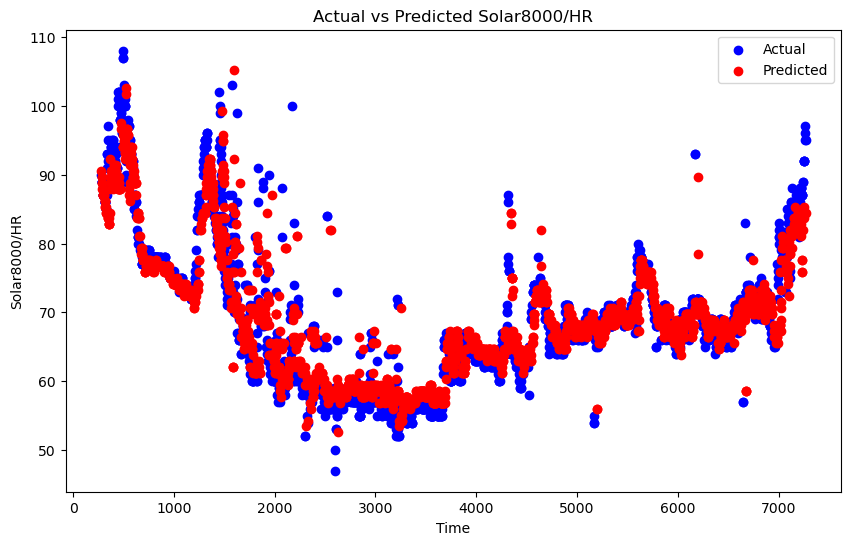

Root Mean Squared Error: 5.006280971840527


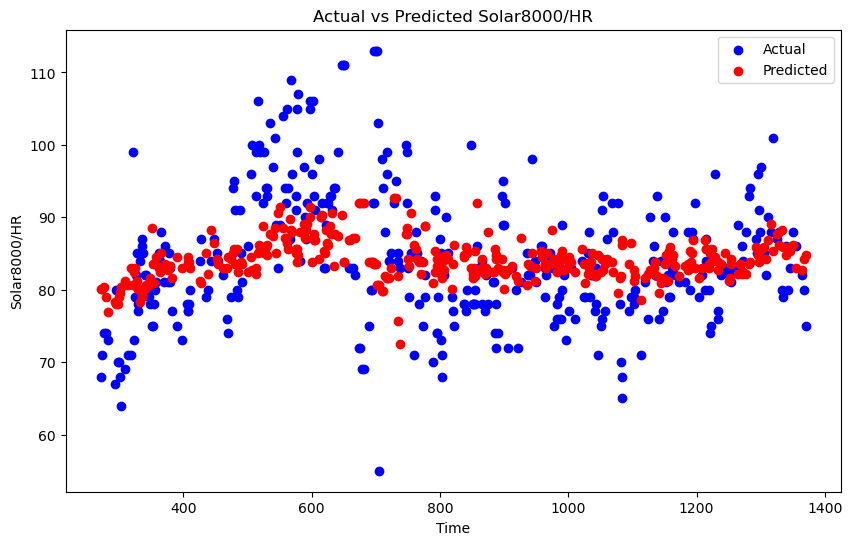

Root Mean Squared Error: 8.820144535320717


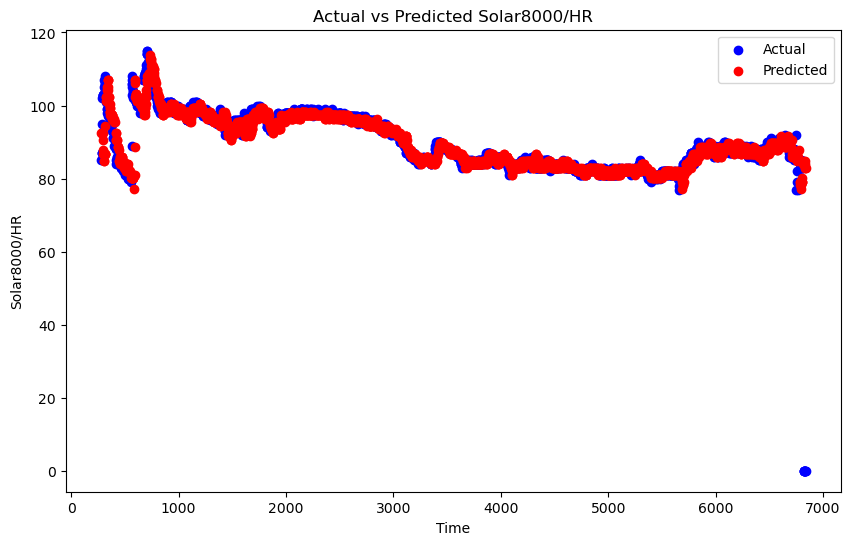

Root Mean Squared Error: 6.15143391969524


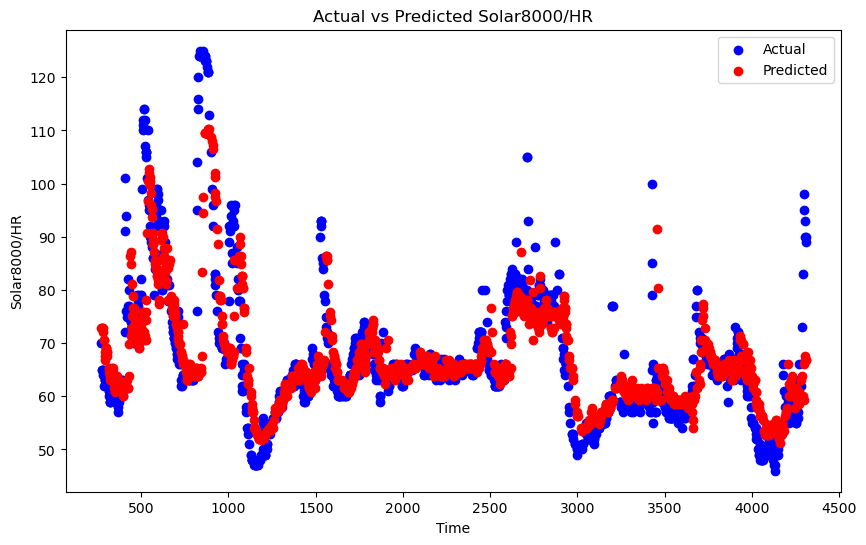

Root Mean Squared Error: 9.675649792862414


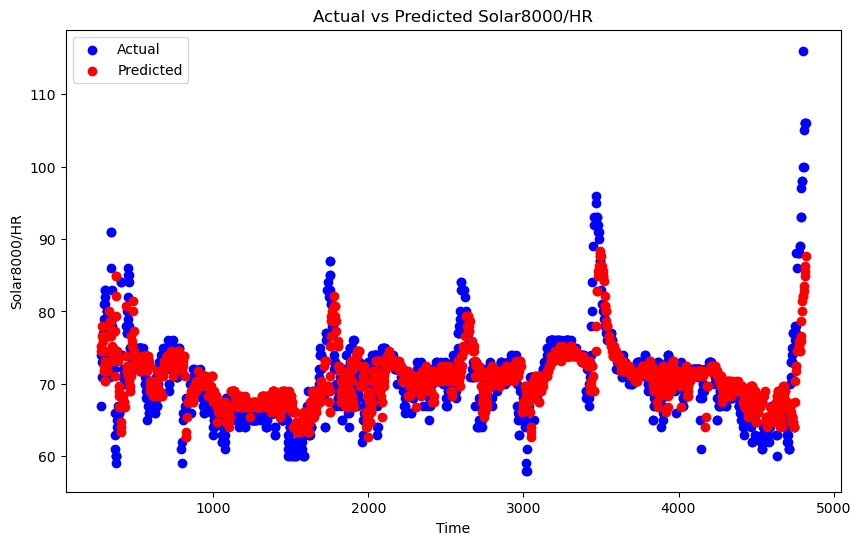

Root Mean Squared Error: 4.814388686437313


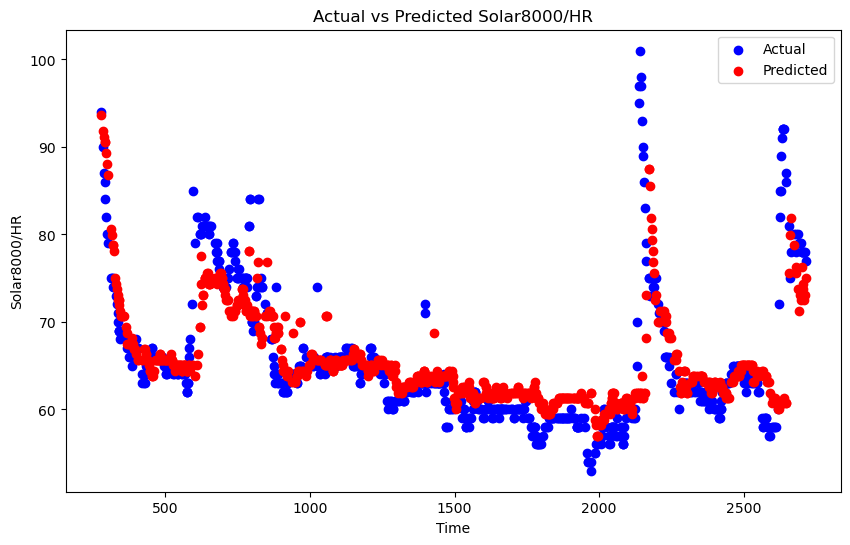

Root Mean Squared Error: 5.865873535762513


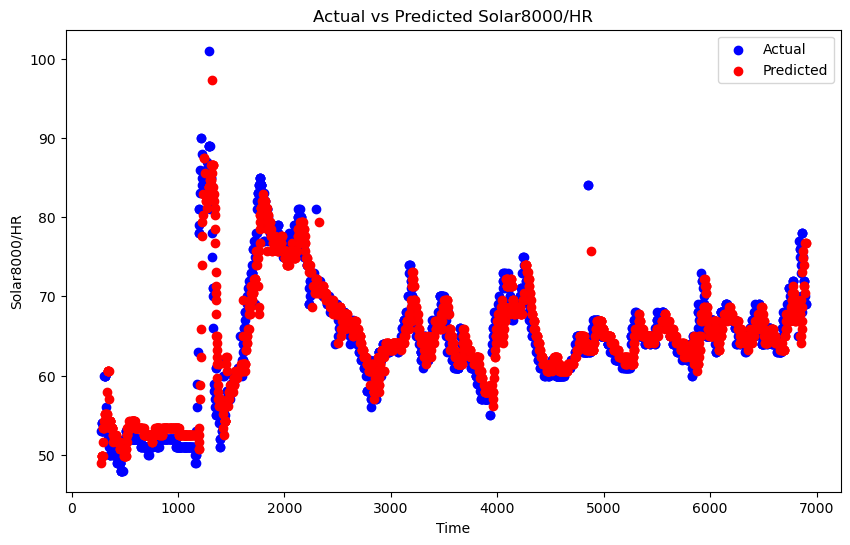

Root Mean Squared Error: 3.4913874438318078


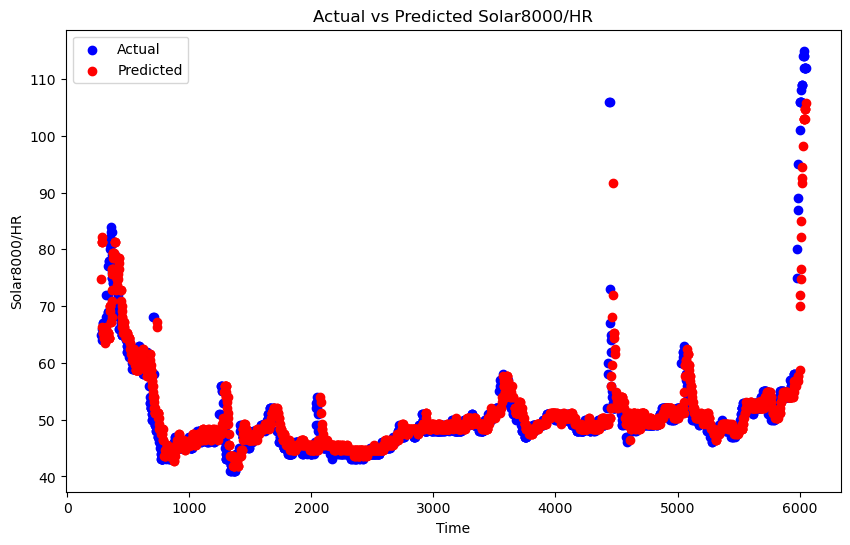

Root Mean Squared Error: 4.430695525212218


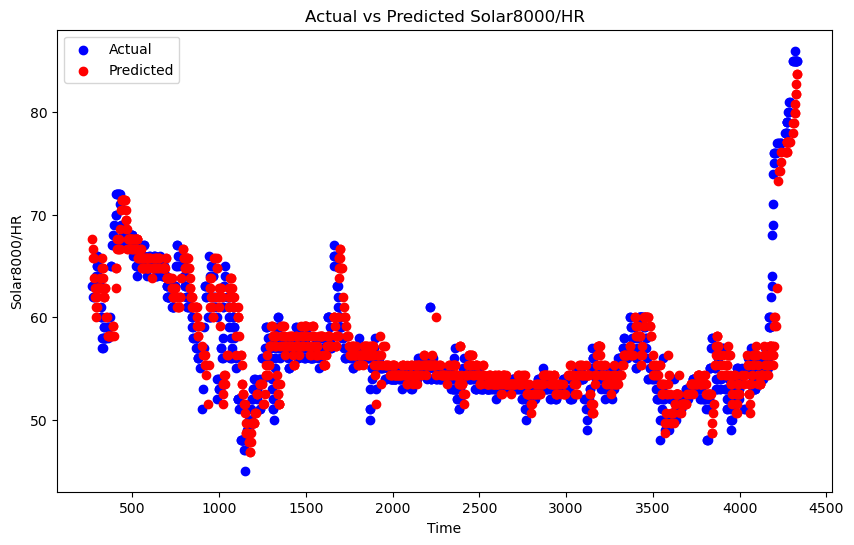

Root Mean Squared Error: 3.1570528529590987


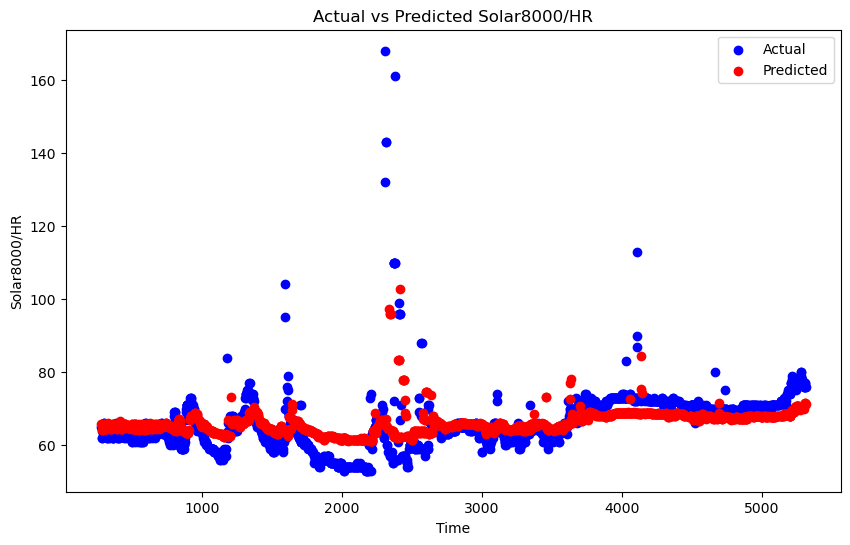

Root Mean Squared Error: 7.644934901294949


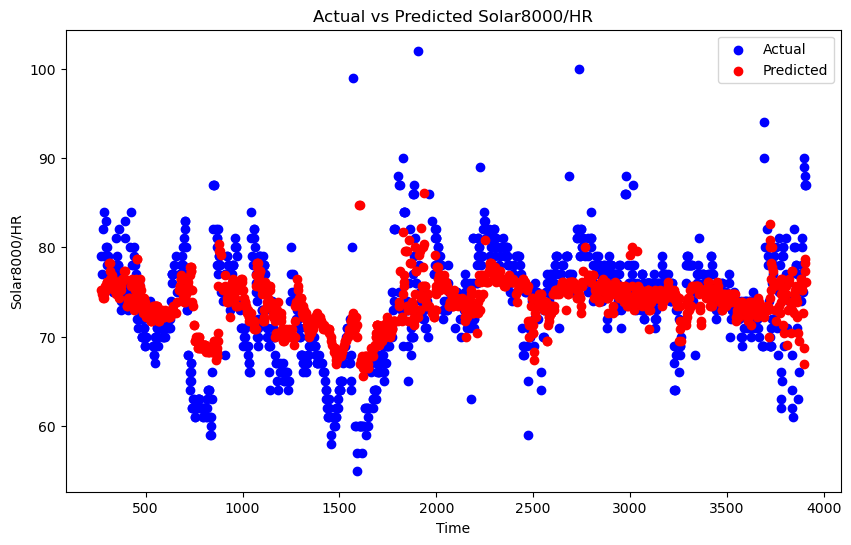

Root Mean Squared Error: 5.316575075325017


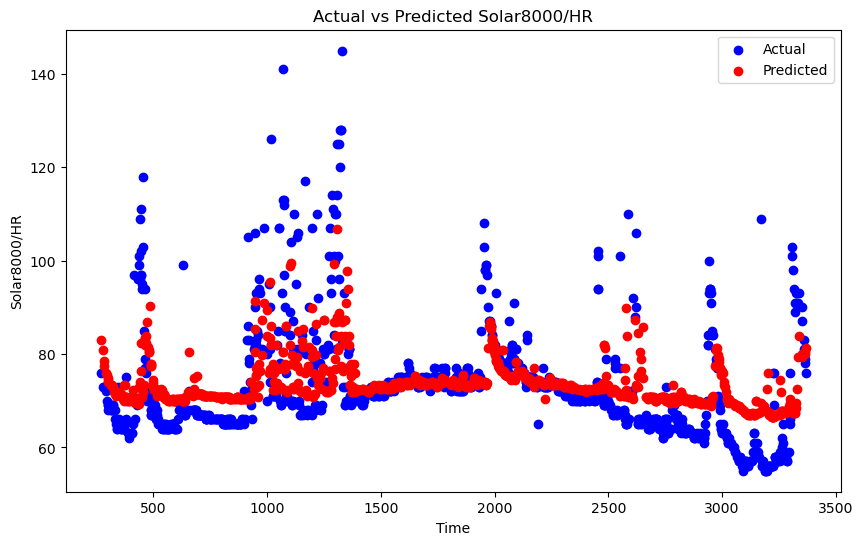

Root Mean Squared Error: 10.852050299353426


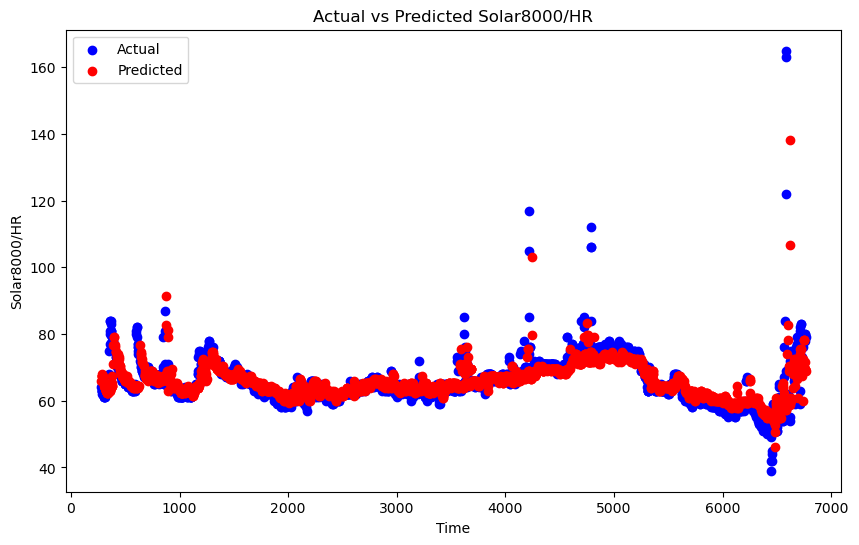

Root Mean Squared Error: 5.90484902451067


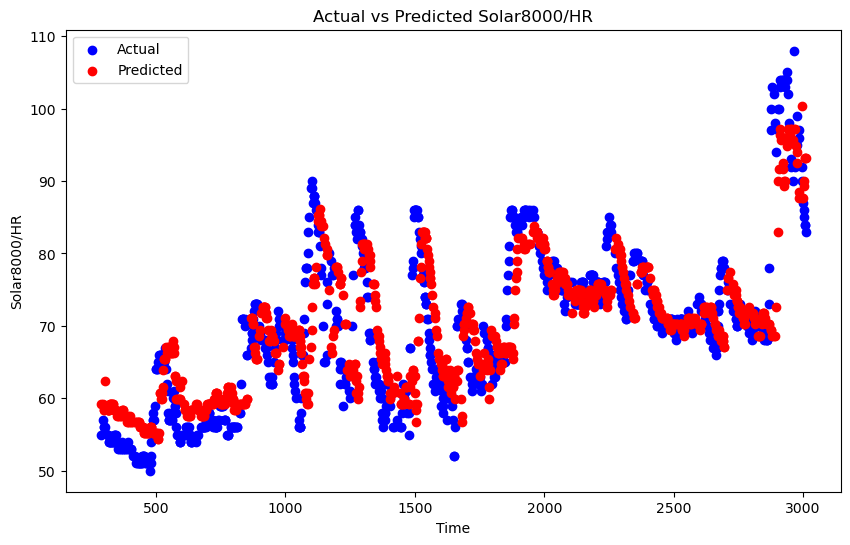

Root Mean Squared Error: 7.309024049003137


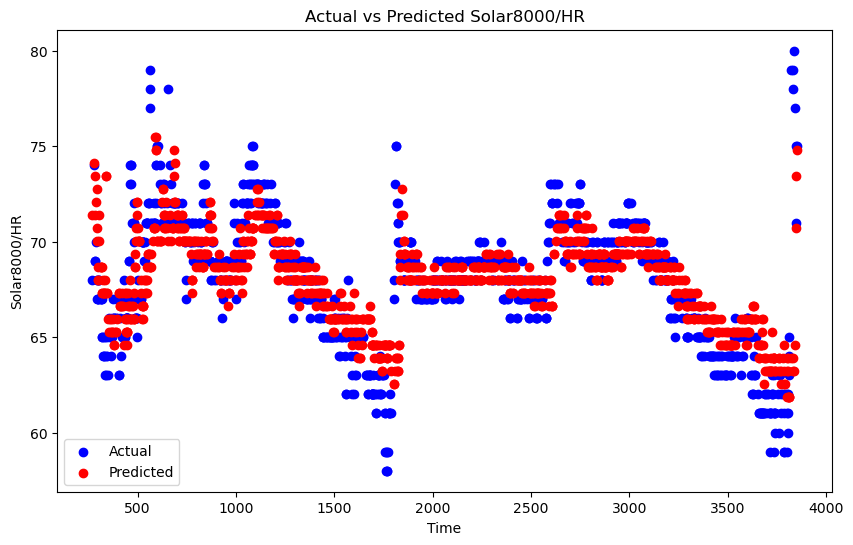

Root Mean Squared Error: 2.3814198779820863


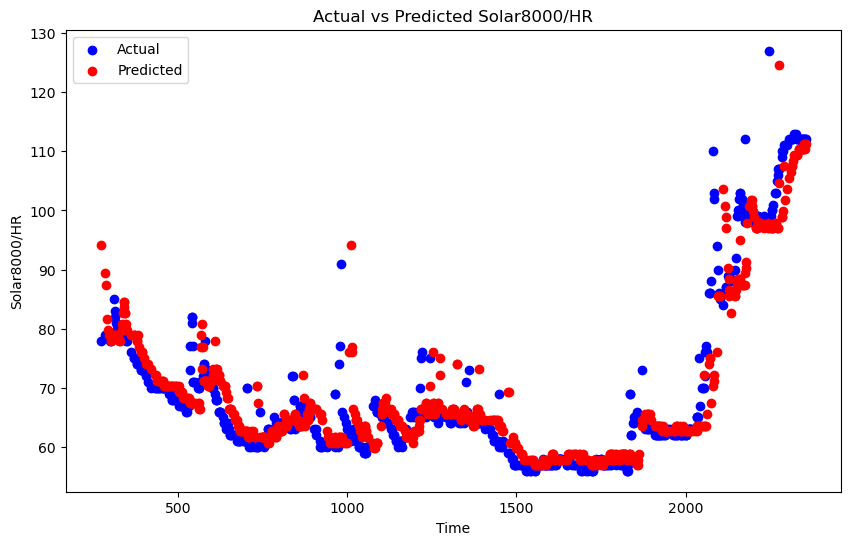

Root Mean Squared Error: 5.494240658935208


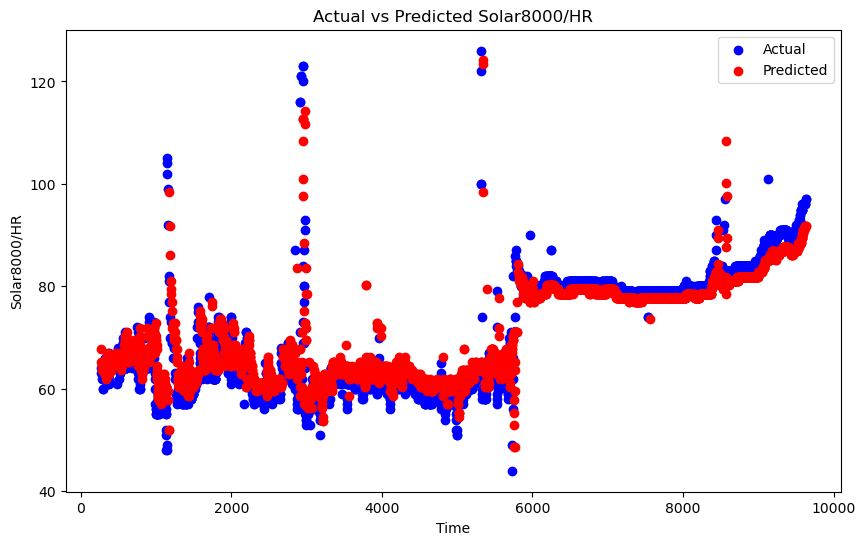

Root Mean Squared Error: 5.59308647892282


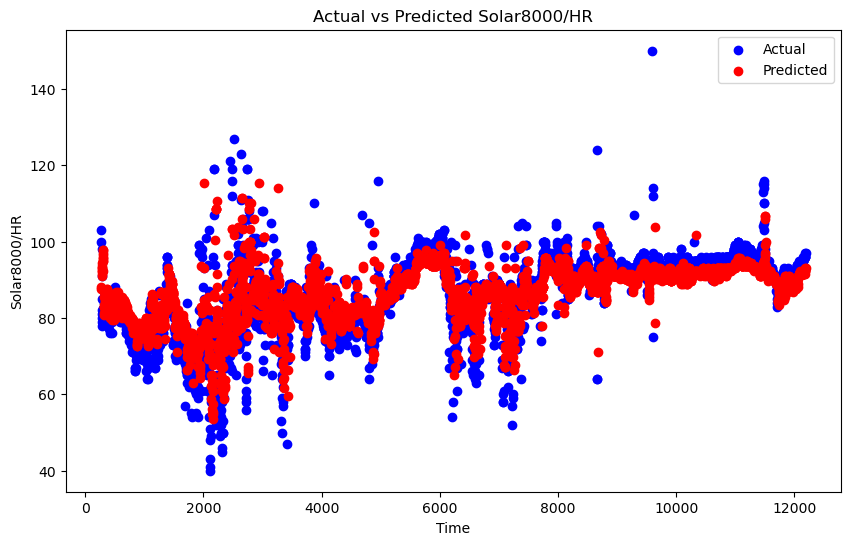

Root Mean Squared Error: 7.452864597438571


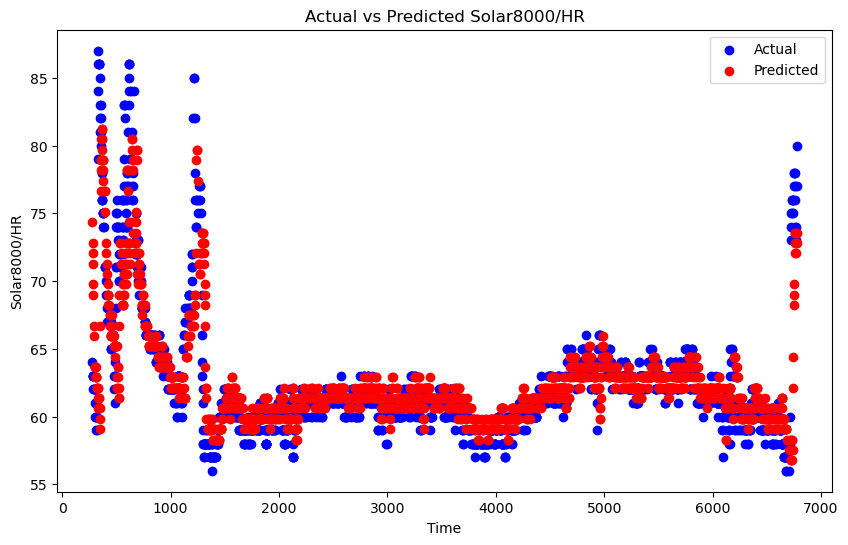

Root Mean Squared Error: 3.17530270573345


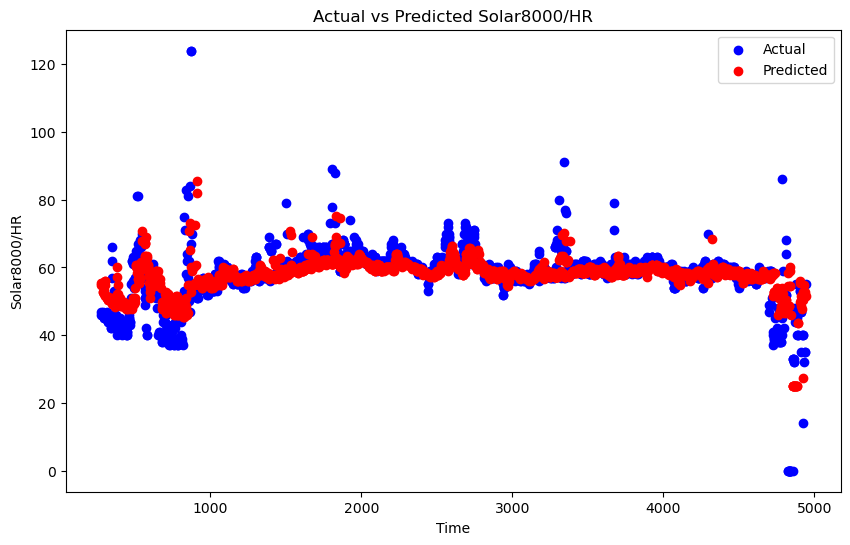

Root Mean Squared Error: 7.617797826165258


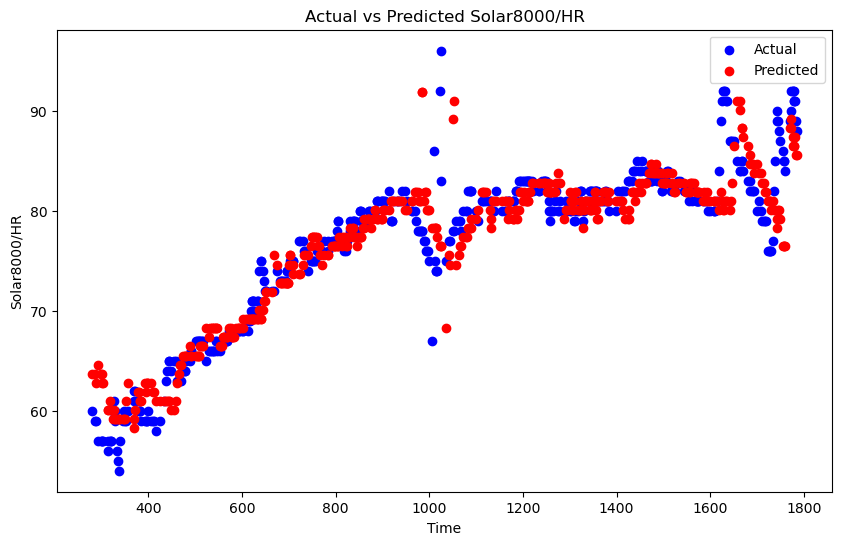

Root Mean Squared Error: 3.3323737428139126


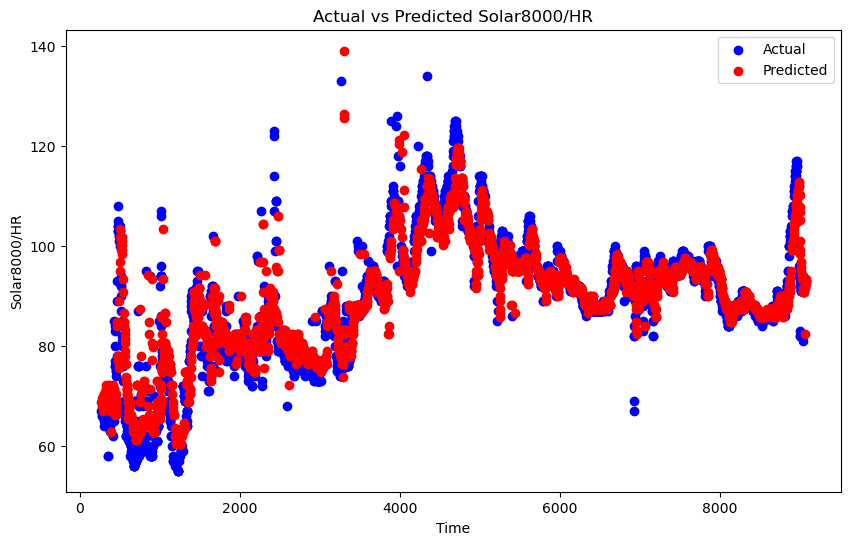

Root Mean Squared Error: 6.421755794940473


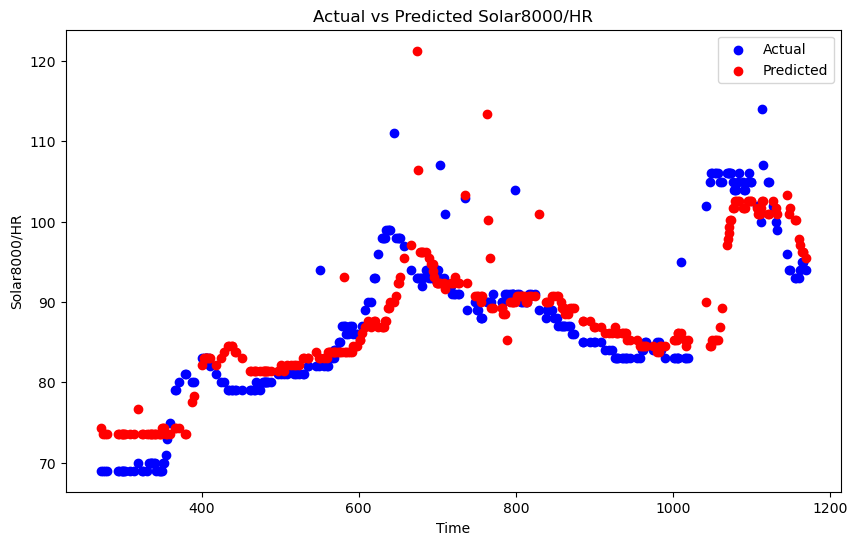

Root Mean Squared Error: 5.802454002676266


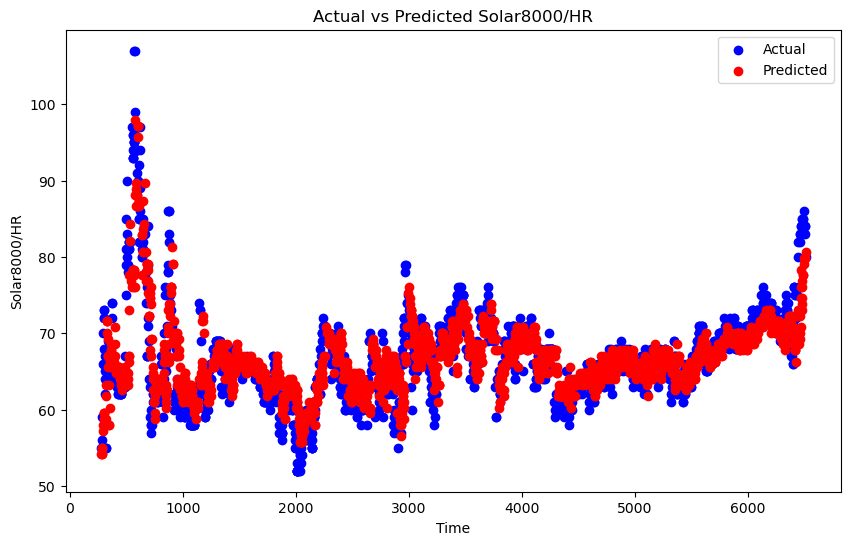

Root Mean Squared Error: 4.043965397330623


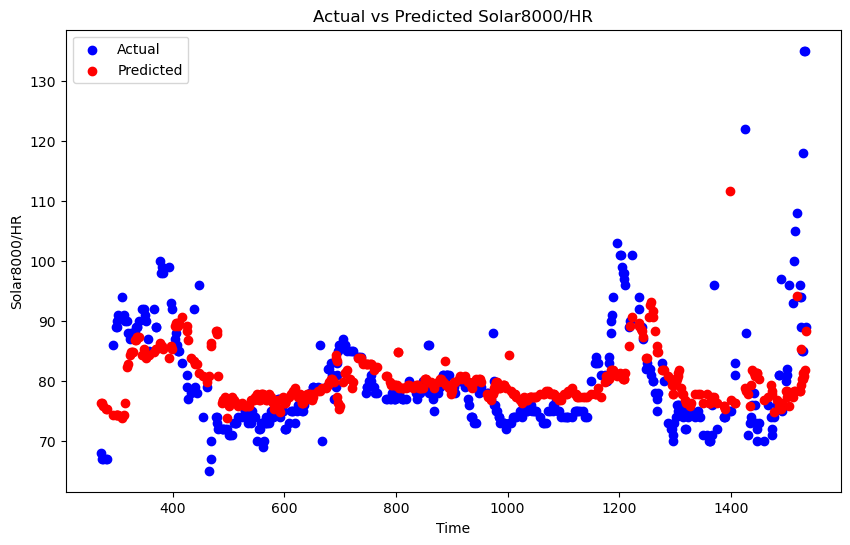

Root Mean Squared Error: 8.376487343989142


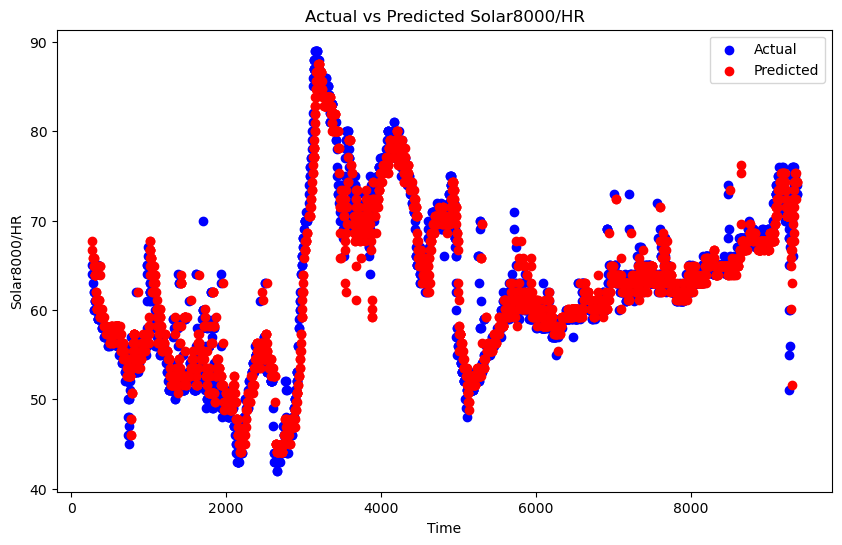

Root Mean Squared Error: 3.0871331446370975


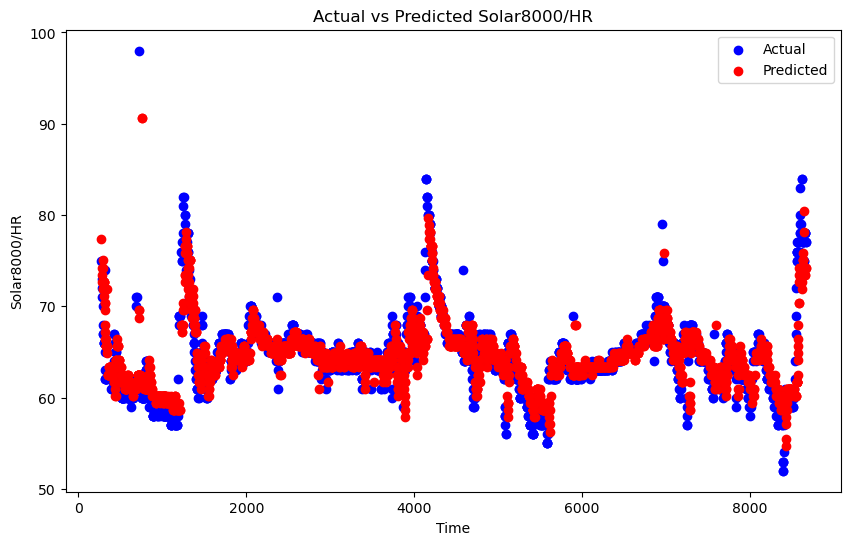

Root Mean Squared Error: 2.7293847264194704


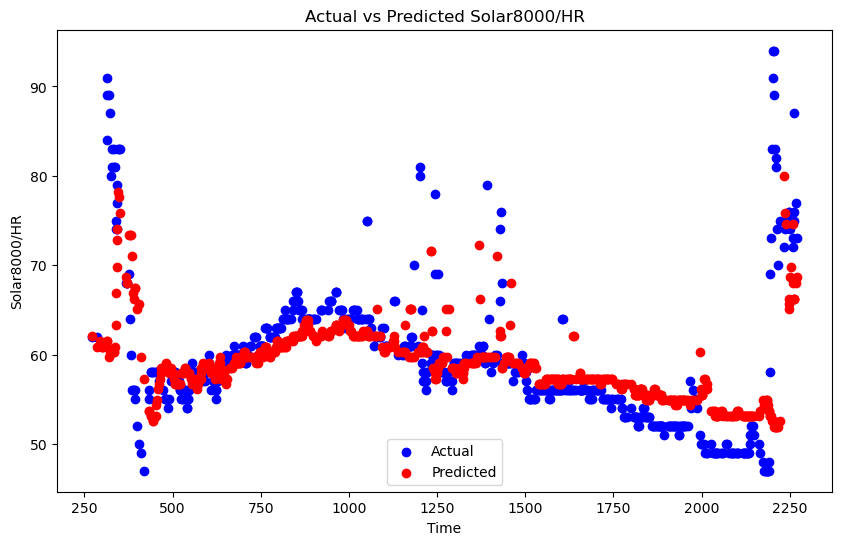

Root Mean Squared Error: 6.665831889852125


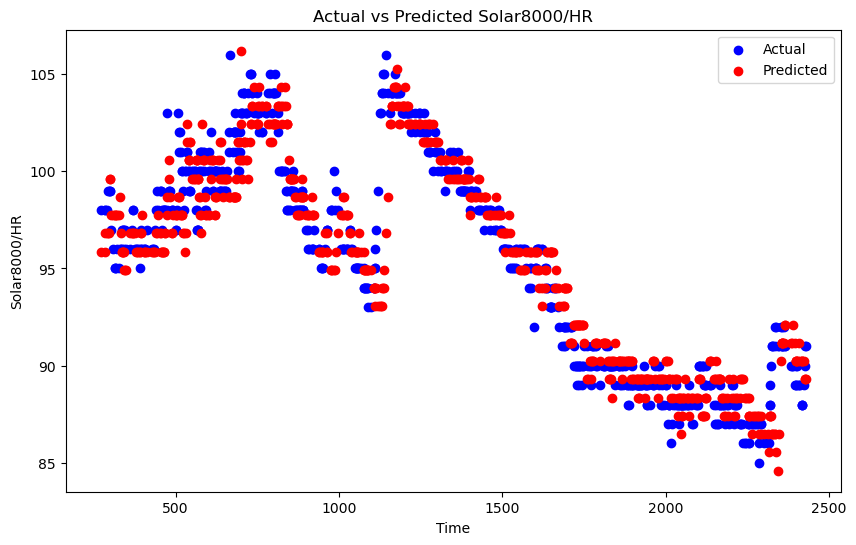

Root Mean Squared Error: 2.019813496938051


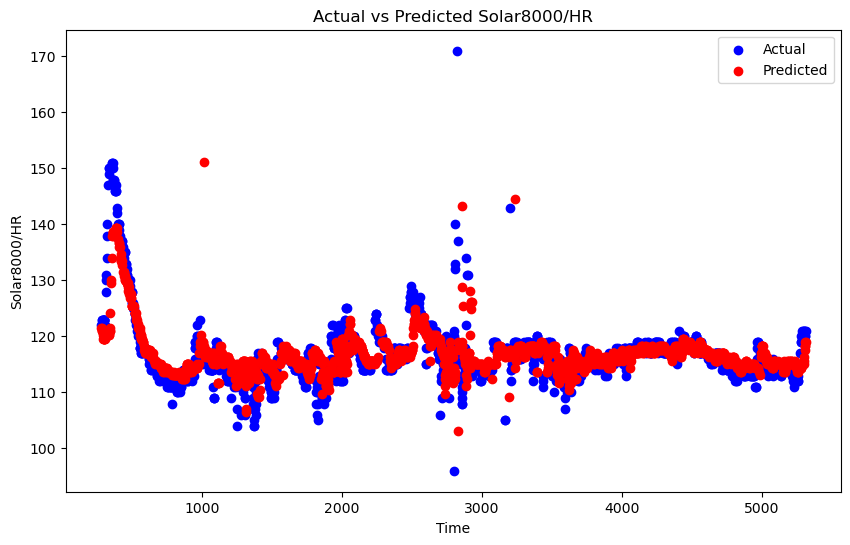

Root Mean Squared Error: 4.567231783267954


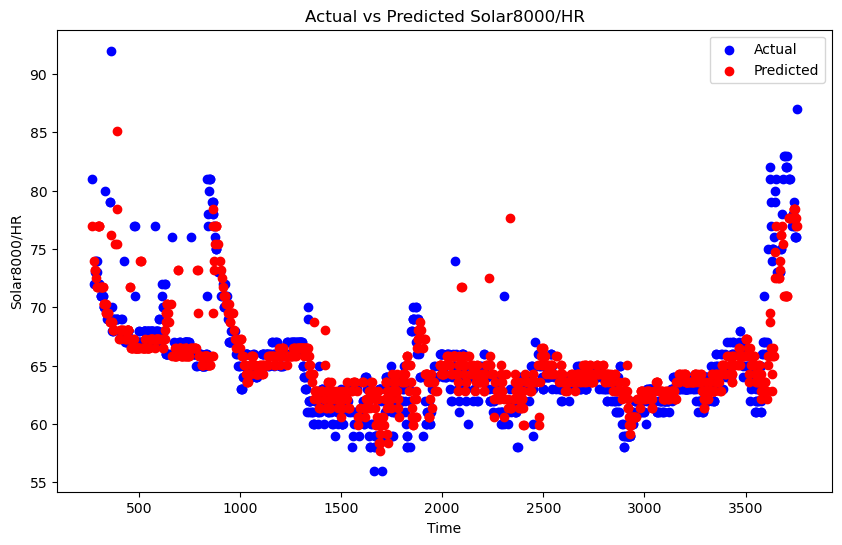

Root Mean Squared Error: 3.149805795951215


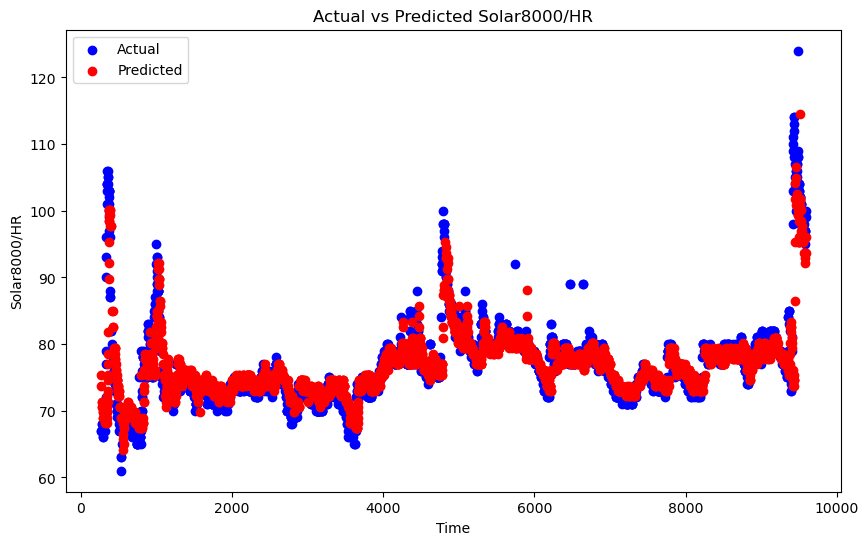

Root Mean Squared Error: 3.970265506520469


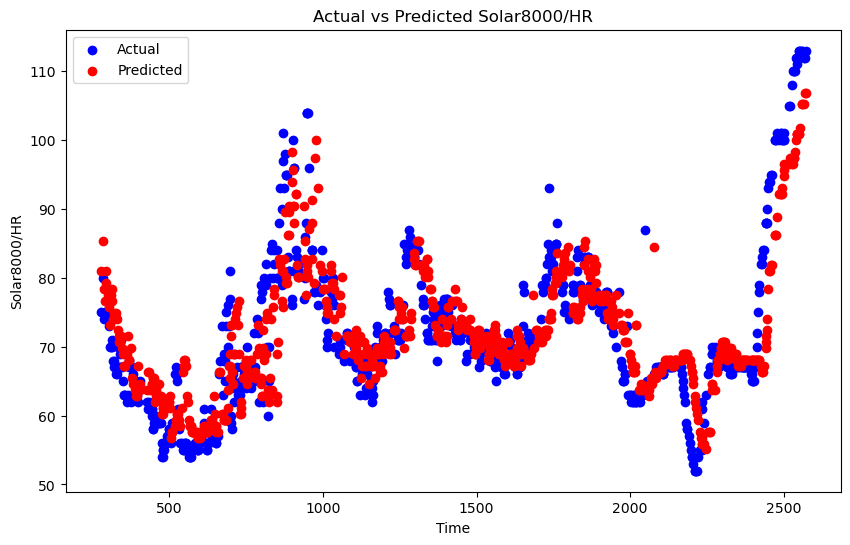

Root Mean Squared Error: 6.7209172398025805


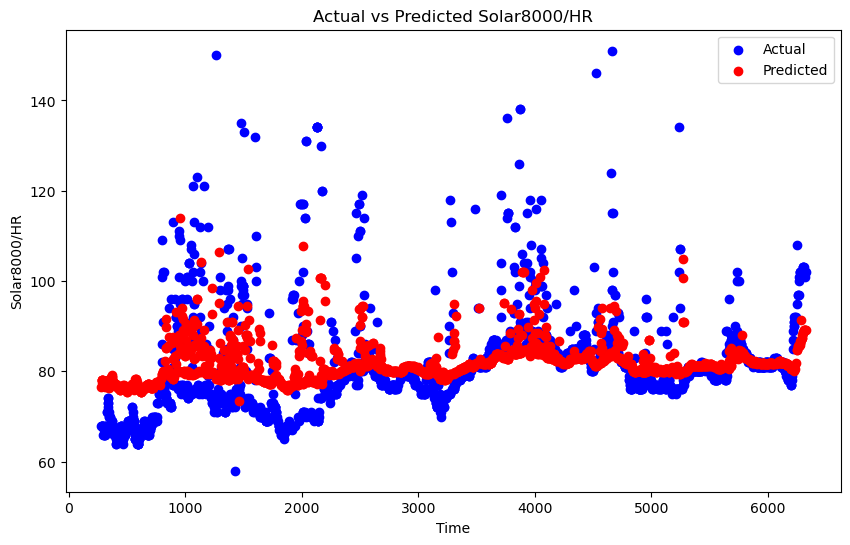

Root Mean Squared Error: 10.391333997434005


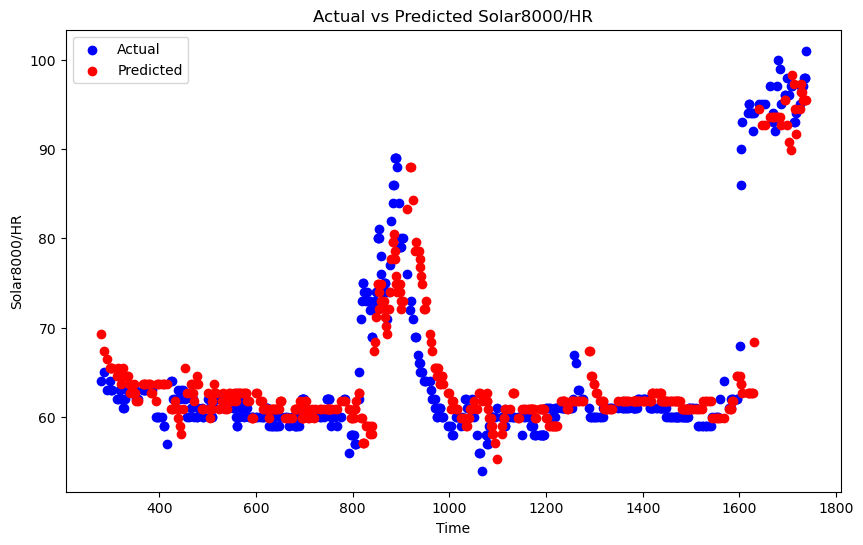

Root Mean Squared Error: 5.865973751915267


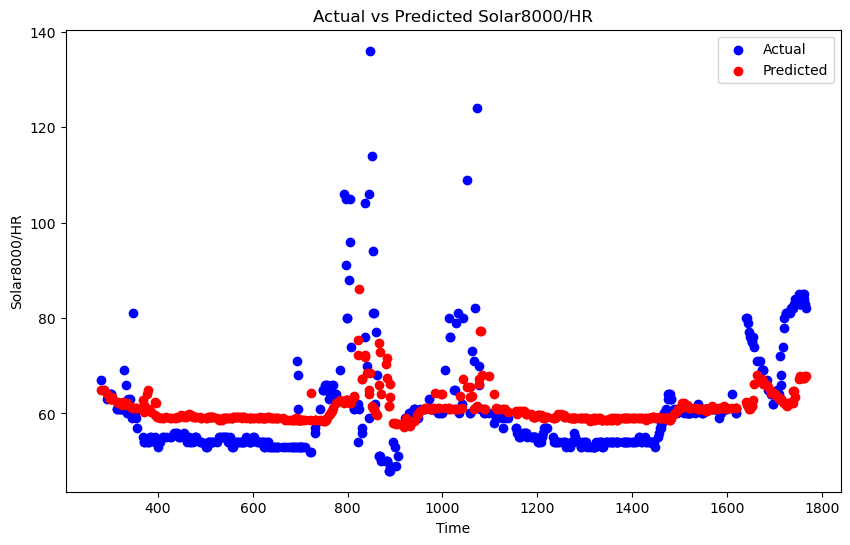

Root Mean Squared Error: 10.270252139572968


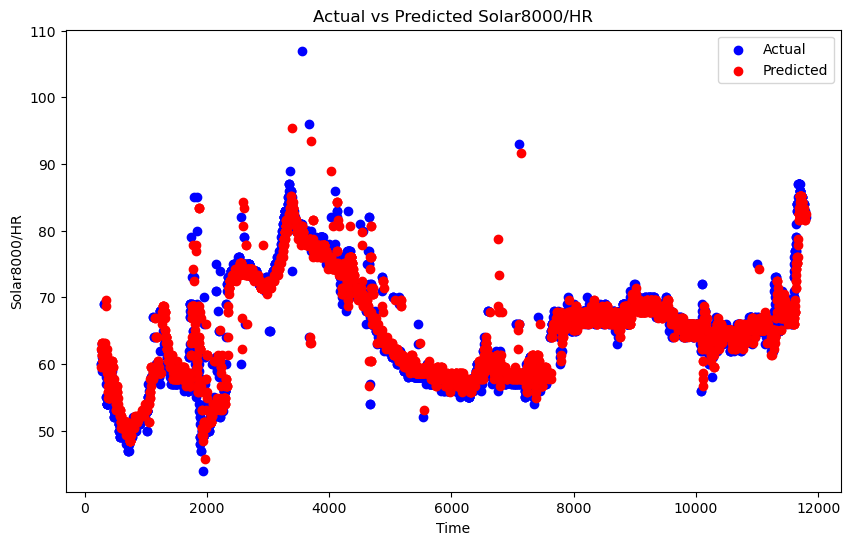

Root Mean Squared Error: 3.2369135101013913


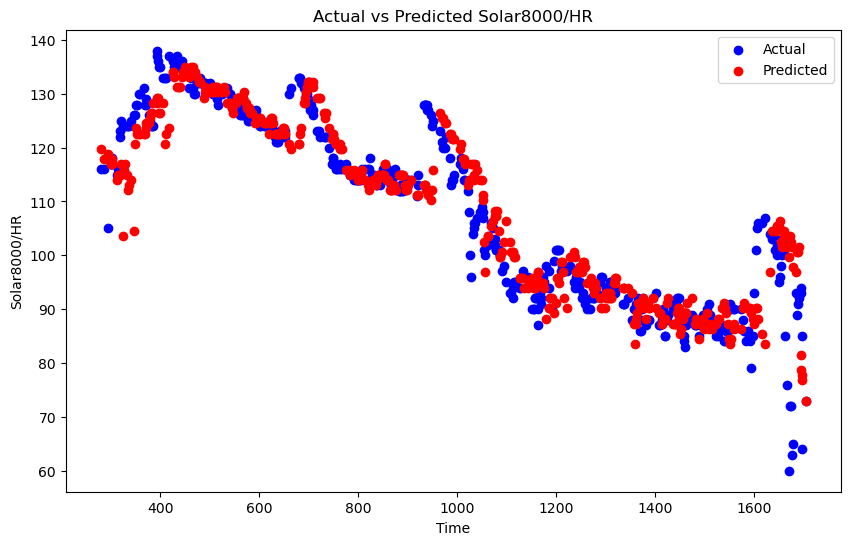

Root Mean Squared Error: 6.7484625396789495


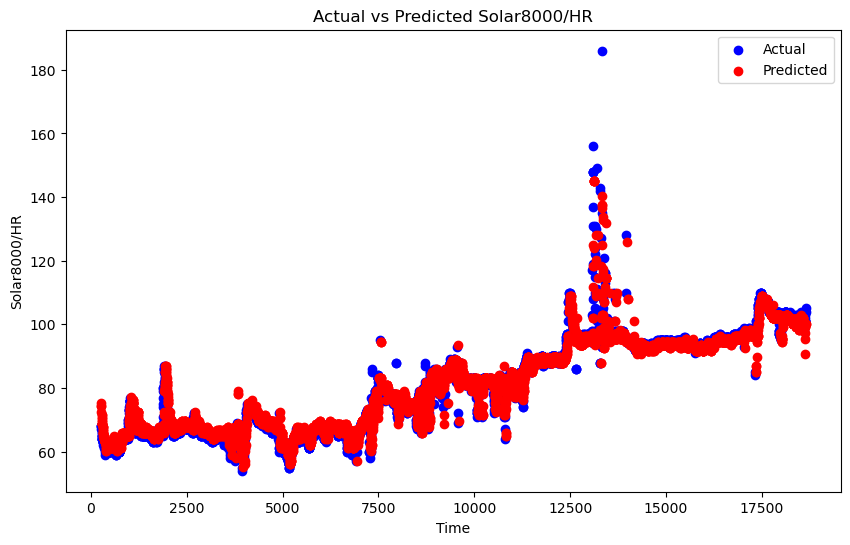

Root Mean Squared Error: 4.4575253129076575


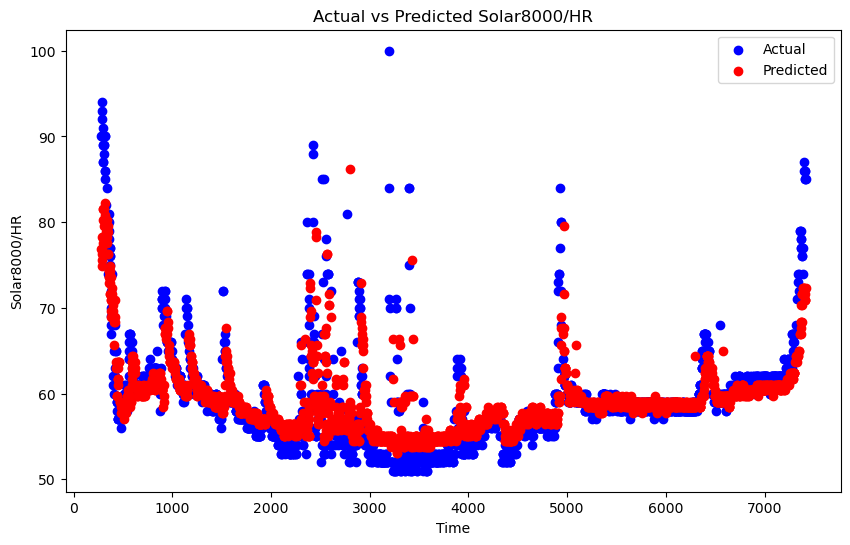

Root Mean Squared Error: 4.414464959284428


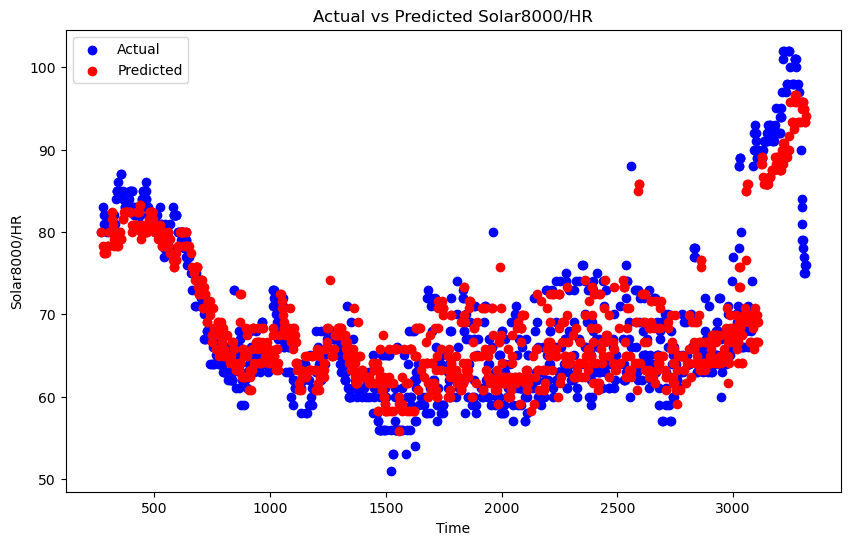

Root Mean Squared Error: 6.007392960046829


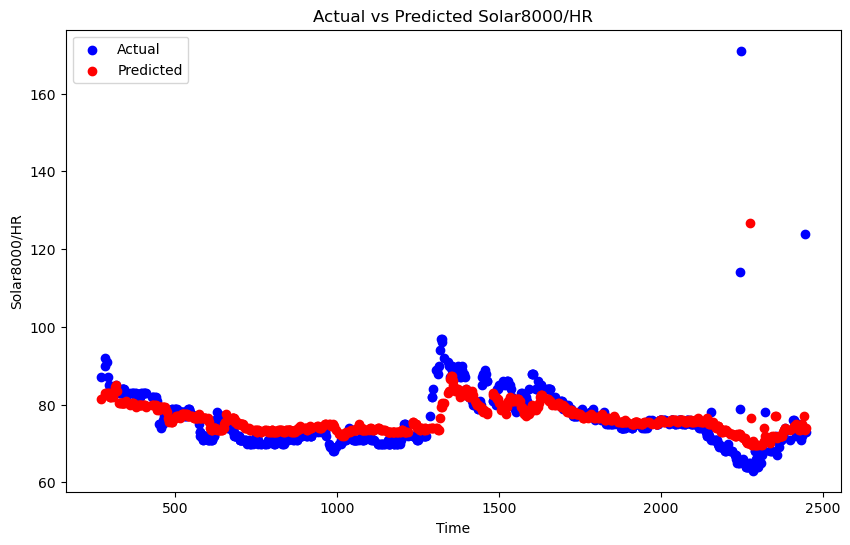

Root Mean Squared Error: 6.177357977105648


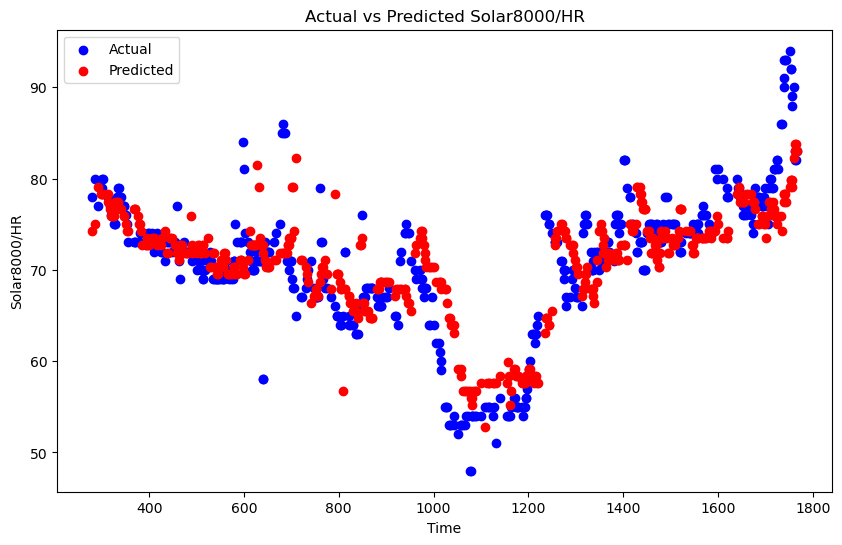

Root Mean Squared Error: 4.8343193864859675


In [111]:
train_and_predict_multiple(HRDATA,30)

In [113]:
pd.DataFrame(rmse_list).mean()

0    5.69144
dtype: float64